# Social Network Analysis with Python


## 1. Preparing Data
### Getting all the emails

In [1]:
# Import needed libraries
import glob
import os
import re
from pprint import pprint 
import numpy as np
import pandas as pd
import codecs as co
from email.parser import Parser
import networkx as nx
import matplotlib.pyplot as plt
import community

In [2]:
# Get paths to all subdirectories 'inbox'
usernames = []
email = []
usernames = os.listdir("C:/Users/dell/Desktop/M3/SNA/maildir")
#pprint(usernames)
for email in glob.iglob('C:/Users/dell/Desktop/M3/SNA/maildir/**/inbox/*', recursive=True):
    pprint(email)

'C:/Users/dell/Desktop/M3/SNA/maildir\\allen-p\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\allen-p\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\allen-p\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\allen-p\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\allen-p\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\allen-p\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/maildir\\allen-p\\inbox\\15'
'C:/Users/dell/Desktop/M3/SNA/maildir\\allen-p\\inbox\\16'
'C:/Users/dell/Desktop/M3/SNA/maildir\\allen-p\\inbox\\17'
'C:/Users/dell/Desktop/M3/SNA/maildir\\allen-p\\inbox\\18'
'C:/Users/dell/Desktop/M3/SNA/maildir\\allen-p\\inbox\\19'
'C:/Users/dell/Desktop/M3/SNA/maildir\\allen-p\\inbox\\2'
'C:/Users/dell/Desktop/M3/SNA/maildir\\allen-p\\inbox\\20'
'C:/Users/dell/Desktop/M3/SNA/maildir\\allen-p\\inbox\\21'
'C:/Users/dell/Desktop/M3/SNA/maildir\\allen-p\\inbox\\22'
'C:/Users/dell/Desktop/M3/SNA/maildir\\allen-p\\inbox\\23'
'C:/Users/dell/Desktop/M3/SNA/maildir\\allen-p\\inbox\\24'

'C:/Users/dell/Desktop/M3/SNA/maildir\\bass-e\\inbox\\291'
'C:/Users/dell/Desktop/M3/SNA/maildir\\bass-e\\inbox\\292'
'C:/Users/dell/Desktop/M3/SNA/maildir\\bass-e\\inbox\\293'
'C:/Users/dell/Desktop/M3/SNA/maildir\\bass-e\\inbox\\294'
'C:/Users/dell/Desktop/M3/SNA/maildir\\bass-e\\inbox\\295'
'C:/Users/dell/Desktop/M3/SNA/maildir\\bass-e\\inbox\\296'
'C:/Users/dell/Desktop/M3/SNA/maildir\\bass-e\\inbox\\297'
'C:/Users/dell/Desktop/M3/SNA/maildir\\bass-e\\inbox\\298'
'C:/Users/dell/Desktop/M3/SNA/maildir\\bass-e\\inbox\\299'
'C:/Users/dell/Desktop/M3/SNA/maildir\\bass-e\\inbox\\30'
'C:/Users/dell/Desktop/M3/SNA/maildir\\bass-e\\inbox\\301'
'C:/Users/dell/Desktop/M3/SNA/maildir\\bass-e\\inbox\\302'
'C:/Users/dell/Desktop/M3/SNA/maildir\\bass-e\\inbox\\303'
'C:/Users/dell/Desktop/M3/SNA/maildir\\bass-e\\inbox\\304'
'C:/Users/dell/Desktop/M3/SNA/maildir\\bass-e\\inbox\\305'
'C:/Users/dell/Desktop/M3/SNA/maildir\\bass-e\\inbox\\306'
'C:/Users/dell/Desktop/M3/SNA/maildir\\bass-e\\inbox\\308

'C:/Users/dell/Desktop/M3/SNA/maildir\\beck-s\\inbox\\593'
'C:/Users/dell/Desktop/M3/SNA/maildir\\beck-s\\inbox\\594'
'C:/Users/dell/Desktop/M3/SNA/maildir\\beck-s\\inbox\\595'
'C:/Users/dell/Desktop/M3/SNA/maildir\\beck-s\\inbox\\596'
'C:/Users/dell/Desktop/M3/SNA/maildir\\beck-s\\inbox\\597'
'C:/Users/dell/Desktop/M3/SNA/maildir\\beck-s\\inbox\\598'
'C:/Users/dell/Desktop/M3/SNA/maildir\\beck-s\\inbox\\599'
'C:/Users/dell/Desktop/M3/SNA/maildir\\beck-s\\inbox\\6'
'C:/Users/dell/Desktop/M3/SNA/maildir\\beck-s\\inbox\\60'
'C:/Users/dell/Desktop/M3/SNA/maildir\\beck-s\\inbox\\600'
'C:/Users/dell/Desktop/M3/SNA/maildir\\beck-s\\inbox\\601'
'C:/Users/dell/Desktop/M3/SNA/maildir\\beck-s\\inbox\\602'
'C:/Users/dell/Desktop/M3/SNA/maildir\\beck-s\\inbox\\603'
'C:/Users/dell/Desktop/M3/SNA/maildir\\beck-s\\inbox\\604'
'C:/Users/dell/Desktop/M3/SNA/maildir\\beck-s\\inbox\\605'
'C:/Users/dell/Desktop/M3/SNA/maildir\\beck-s\\inbox\\606'
'C:/Users/dell/Desktop/M3/SNA/maildir\\beck-s\\inbox\\607'


'C:/Users/dell/Desktop/M3/SNA/maildir\\brawner-s\\inbox\\57'
'C:/Users/dell/Desktop/M3/SNA/maildir\\brawner-s\\inbox\\58'
'C:/Users/dell/Desktop/M3/SNA/maildir\\brawner-s\\inbox\\59'
'C:/Users/dell/Desktop/M3/SNA/maildir\\brawner-s\\inbox\\6'
'C:/Users/dell/Desktop/M3/SNA/maildir\\brawner-s\\inbox\\65'
'C:/Users/dell/Desktop/M3/SNA/maildir\\brawner-s\\inbox\\66'
'C:/Users/dell/Desktop/M3/SNA/maildir\\brawner-s\\inbox\\67'
'C:/Users/dell/Desktop/M3/SNA/maildir\\brawner-s\\inbox\\68'
'C:/Users/dell/Desktop/M3/SNA/maildir\\brawner-s\\inbox\\69'
'C:/Users/dell/Desktop/M3/SNA/maildir\\brawner-s\\inbox\\7'
'C:/Users/dell/Desktop/M3/SNA/maildir\\brawner-s\\inbox\\70'
'C:/Users/dell/Desktop/M3/SNA/maildir\\brawner-s\\inbox\\71'
'C:/Users/dell/Desktop/M3/SNA/maildir\\brawner-s\\inbox\\72'
'C:/Users/dell/Desktop/M3/SNA/maildir\\brawner-s\\inbox\\73'
'C:/Users/dell/Desktop/M3/SNA/maildir\\brawner-s\\inbox\\74'
'C:/Users/dell/Desktop/M3/SNA/maildir\\brawner-s\\inbox\\75'
'C:/Users/dell/Desktop/M3/

'C:/Users/dell/Desktop/M3/SNA/maildir\\buy-r\\inbox\\528'
'C:/Users/dell/Desktop/M3/SNA/maildir\\buy-r\\inbox\\529'
'C:/Users/dell/Desktop/M3/SNA/maildir\\buy-r\\inbox\\53'
'C:/Users/dell/Desktop/M3/SNA/maildir\\buy-r\\inbox\\530'
'C:/Users/dell/Desktop/M3/SNA/maildir\\buy-r\\inbox\\531'
'C:/Users/dell/Desktop/M3/SNA/maildir\\buy-r\\inbox\\532'
'C:/Users/dell/Desktop/M3/SNA/maildir\\buy-r\\inbox\\533'
'C:/Users/dell/Desktop/M3/SNA/maildir\\buy-r\\inbox\\534'
'C:/Users/dell/Desktop/M3/SNA/maildir\\buy-r\\inbox\\536'
'C:/Users/dell/Desktop/M3/SNA/maildir\\buy-r\\inbox\\537'
'C:/Users/dell/Desktop/M3/SNA/maildir\\buy-r\\inbox\\538'
'C:/Users/dell/Desktop/M3/SNA/maildir\\buy-r\\inbox\\539'
'C:/Users/dell/Desktop/M3/SNA/maildir\\buy-r\\inbox\\54'
'C:/Users/dell/Desktop/M3/SNA/maildir\\buy-r\\inbox\\540'
'C:/Users/dell/Desktop/M3/SNA/maildir\\buy-r\\inbox\\541'
'C:/Users/dell/Desktop/M3/SNA/maildir\\buy-r\\inbox\\542'
'C:/Users/dell/Desktop/M3/SNA/maildir\\buy-r\\inbox\\543'
'C:/Users/dell/D

'C:/Users/dell/Desktop/M3/SNA/maildir\\campbell-l\\inbox\\352'
'C:/Users/dell/Desktop/M3/SNA/maildir\\campbell-l\\inbox\\353'
'C:/Users/dell/Desktop/M3/SNA/maildir\\campbell-l\\inbox\\354'
'C:/Users/dell/Desktop/M3/SNA/maildir\\campbell-l\\inbox\\355'
'C:/Users/dell/Desktop/M3/SNA/maildir\\campbell-l\\inbox\\356'
'C:/Users/dell/Desktop/M3/SNA/maildir\\campbell-l\\inbox\\357'
'C:/Users/dell/Desktop/M3/SNA/maildir\\campbell-l\\inbox\\358'
'C:/Users/dell/Desktop/M3/SNA/maildir\\campbell-l\\inbox\\359'
'C:/Users/dell/Desktop/M3/SNA/maildir\\campbell-l\\inbox\\36'
'C:/Users/dell/Desktop/M3/SNA/maildir\\campbell-l\\inbox\\360'
'C:/Users/dell/Desktop/M3/SNA/maildir\\campbell-l\\inbox\\361'
'C:/Users/dell/Desktop/M3/SNA/maildir\\campbell-l\\inbox\\362'
'C:/Users/dell/Desktop/M3/SNA/maildir\\campbell-l\\inbox\\363'
'C:/Users/dell/Desktop/M3/SNA/maildir\\campbell-l\\inbox\\364'
'C:/Users/dell/Desktop/M3/SNA/maildir\\campbell-l\\inbox\\365'
'C:/Users/dell/Desktop/M3/SNA/maildir\\campbell-l\\inbox

'C:/Users/dell/Desktop/M3/SNA/maildir\\cash-m\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cash-m\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cash-m\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cash-m\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cash-m\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cash-m\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cash-m\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cash-m\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cash-m\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cash-m\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cash-m\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cash-m\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cash-m\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cash-m\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cash-m\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cash-m\\inbox\\112'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cash-m\\inbox\\113'
'

'C:/Users/dell/Desktop/M3/SNA/maildir\\causholli-m\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\causholli-m\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\causholli-m\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\causholli-m\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\causholli-m\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\causholli-m\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\causholli-m\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\causholli-m\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\causholli-m\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\causholli-m\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\causholli-m\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\causholli-m\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\causholli-m\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\causholli-m\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\causholli-m\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\caush

'C:/Users/dell/Desktop/M3/SNA/maildir\\corman-s\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\corman-s\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\corman-s\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\corman-s\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\corman-s\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\corman-s\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/maildir\\corman-s\\inbox\\15'
'C:/Users/dell/Desktop/M3/SNA/maildir\\corman-s\\inbox\\16'
'C:/Users/dell/Desktop/M3/SNA/maildir\\corman-s\\inbox\\17'
'C:/Users/dell/Desktop/M3/SNA/maildir\\corman-s\\inbox\\18'
'C:/Users/dell/Desktop/M3/SNA/maildir\\corman-s\\inbox\\19'
'C:/Users/dell/Desktop/M3/SNA/maildir\\corman-s\\inbox\\2'
'C:/Users/dell/Desktop/M3/SNA/maildir\\corman-s\\inbox\\20'
'C:/Users/dell/Desktop/M3/SNA/maildir\\corman-s\\inbox\\21'
'C:/Users/dell/Desktop/M3/SNA/maildir\\corman-s\\inbox\\22'
'C:/Users/dell/Desktop/M3/SNA/maildir\\corman-s\\inbox\\23'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cor

'C:/Users/dell/Desktop/M3/SNA/maildir\\cuilla-m\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cuilla-m\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cuilla-m\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cuilla-m\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cuilla-m\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cuilla-m\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cuilla-m\\inbox\\15'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cuilla-m\\inbox\\16'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cuilla-m\\inbox\\17'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cuilla-m\\inbox\\18'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cuilla-m\\inbox\\19'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cuilla-m\\inbox\\2'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cuilla-m\\inbox\\20'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cuilla-m\\inbox\\21'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cuilla-m\\inbox\\22'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cuilla-m\\inbox\\23'
'C:/Users/dell/Desktop/M3/SNA/maildir\\cui

'C:/Users/dell/Desktop/M3/SNA/maildir\\dasovich-j\\inbox\\302'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dasovich-j\\inbox\\303'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dasovich-j\\inbox\\304'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dasovich-j\\inbox\\305'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dasovich-j\\inbox\\306'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dasovich-j\\inbox\\307'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dasovich-j\\inbox\\308'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dasovich-j\\inbox\\309'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dasovich-j\\inbox\\31'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dasovich-j\\inbox\\310'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dasovich-j\\inbox\\311'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dasovich-j\\inbox\\312'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dasovich-j\\inbox\\313'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dasovich-j\\inbox\\314'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dasovich-j\\inbox\\315'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dasovich-j\\inbox

'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\1000'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\1001'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\1002'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\1003'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\1004'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\1005'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\1006'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\1007'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\1008'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\1009'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\1010'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\i

'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\726'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\728'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\729'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\73'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\730'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\731'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\732'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\733'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\734'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\735'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\736'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\738'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\739'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\74'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\740'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\741'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dean-c\\inbox\\742'

'C:/Users/dell/Desktop/M3/SNA/maildir\\derrick-j\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\derrick-j\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\derrick-j\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\derrick-j\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\derrick-j\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\derrick-j\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\derrick-j\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\derrick-j\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\derrick-j\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\derrick-j\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\derrick-j\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\derrick-j\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\derrick-j\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\derrick-j\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\derrick-j\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\derrick-j\\inbox\\112'
'C:/Users/de

'C:/Users/dell/Desktop/M3/SNA/maildir\\donoho-l\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donoho-l\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donoho-l\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donoho-l\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donoho-l\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donoho-l\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donoho-l\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donoho-l\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donoho-l\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donoho-l\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donoho-l\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donoho-l\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donoho-l\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donoho-l\\inbox\\112'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donoho-l\\inbox\\113'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donoho-l\\inbox\\114'
'C:/Users/dell/Desktop/M3/SN

'C:/Users/dell/Desktop/M3/SNA/maildir\\donohoe-t\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donohoe-t\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donohoe-t\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donohoe-t\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donohoe-t\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donohoe-t\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donohoe-t\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donohoe-t\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donohoe-t\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donohoe-t\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donohoe-t\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donohoe-t\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donohoe-t\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donohoe-t\\inbox\\112'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donohoe-t\\inbox\\113'
'C:/Users/dell/Desktop/M3/SNA/maildir\\donohoe-t\\inbox\\114'
'C:/Users/de

'C:/Users/dell/Desktop/M3/SNA/maildir\\dorland-c\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dorland-c\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dorland-c\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dorland-c\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dorland-c\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dorland-c\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dorland-c\\inbox\\15'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dorland-c\\inbox\\16'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dorland-c\\inbox\\17'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dorland-c\\inbox\\18'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dorland-c\\inbox\\19'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dorland-c\\inbox\\2'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dorland-c\\inbox\\20'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dorland-c\\inbox\\21'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dorland-c\\inbox\\22'
'C:/Users/dell/Desktop/M3/SNA/maildir\\dorland-c\\inbox\\23'
'C:/Users/dell/Desktop/M3/

'C:/Users/dell/Desktop/M3/SNA/maildir\\farmer-d\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\farmer-d\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\farmer-d\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\farmer-d\\inbox\\115'
'C:/Users/dell/Desktop/M3/SNA/maildir\\farmer-d\\inbox\\116'
'C:/Users/dell/Desktop/M3/SNA/maildir\\farmer-d\\inbox\\117'
'C:/Users/dell/Desktop/M3/SNA/maildir\\farmer-d\\inbox\\119'
'C:/Users/dell/Desktop/M3/SNA/maildir\\farmer-d\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\farmer-d\\inbox\\120'
'C:/Users/dell/Desktop/M3/SNA/maildir\\farmer-d\\inbox\\121'
'C:/Users/dell/Desktop/M3/SNA/maildir\\farmer-d\\inbox\\122'
'C:/Users/dell/Desktop/M3/SNA/maildir\\farmer-d\\inbox\\123'
'C:/Users/dell/Desktop/M3/SNA/maildir\\farmer-d\\inbox\\124'
'C:/Users/dell/Desktop/M3/SNA/maildir\\farmer-d\\inbox\\127'
'C:/Users/dell/Desktop/M3/SNA/maildir\\farmer-d\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\farmer-d\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/m

'C:/Users/dell/Desktop/M3/SNA/maildir\\forney-j\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\forney-j\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\forney-j\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\forney-j\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\forney-j\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\forney-j\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\forney-j\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\forney-j\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\forney-j\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\forney-j\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\forney-j\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\forney-j\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\forney-j\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\forney-j\\inbox\\112'
'C:/Users/dell/Desktop/M3/SNA/maildir\\forney-j\\inbox\\113'
'C:/Users/dell/Desktop/M3/SNA/maildir\\forney-j\\inbox\\114'
'C:/Users/dell/Desktop/M3/SN

'C:/Users/dell/Desktop/M3/SNA/maildir\\gang-l\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gang-l\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gang-l\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gang-l\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gang-l\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gang-l\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gang-l\\inbox\\15'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gang-l\\inbox\\16'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gang-l\\inbox\\17'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gang-l\\inbox\\18'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gang-l\\inbox\\19'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gang-l\\inbox\\2'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gang-l\\inbox\\20'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gang-l\\inbox\\21'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gang-l\\inbox\\22'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gang-l\\inbox\\23'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gang-l\\inbox\\24'
'C:/Users/dell/D

'C:/Users/dell/Desktop/M3/SNA/maildir\\germany-c\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\germany-c\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\germany-c\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\germany-c\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\germany-c\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\germany-c\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\germany-c\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\germany-c\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\germany-c\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\germany-c\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\germany-c\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\germany-c\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\germany-c\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\germany-c\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\germany-c\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\germany-c\\inbox\\112'
'C:/Users/de

'C:/Users/dell/Desktop/M3/SNA/maildir\\gilbertsmith-d\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gilbertsmith-d\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gilbertsmith-d\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gilbertsmith-d\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gilbertsmith-d\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gilbertsmith-d\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gilbertsmith-d\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gilbertsmith-d\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gilbertsmith-d\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gilbertsmith-d\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gilbertsmith-d\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gilbertsmith-d\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gilbertsmith-d\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gilbertsmith-d\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\gilbertsmith-d\\inbox\\111'

'C:/Users/dell/Desktop/M3/SNA/maildir\\giron-d\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\giron-d\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\giron-d\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\giron-d\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\giron-d\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\giron-d\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\giron-d\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\giron-d\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\giron-d\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\giron-d\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\giron-d\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\giron-d\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\giron-d\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\giron-d\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\giron-d\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\giron-d\\inbox\\112'
'C:/Users/dell/Desktop/M3/SNA/maildir\\giron

'C:/Users/dell/Desktop/M3/SNA/maildir\\griffith-j\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\griffith-j\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\griffith-j\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\griffith-j\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\griffith-j\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/maildir\\griffith-j\\inbox\\15'
'C:/Users/dell/Desktop/M3/SNA/maildir\\griffith-j\\inbox\\16'
'C:/Users/dell/Desktop/M3/SNA/maildir\\griffith-j\\inbox\\17'
'C:/Users/dell/Desktop/M3/SNA/maildir\\griffith-j\\inbox\\18'
'C:/Users/dell/Desktop/M3/SNA/maildir\\griffith-j\\inbox\\19'
'C:/Users/dell/Desktop/M3/SNA/maildir\\griffith-j\\inbox\\2'
'C:/Users/dell/Desktop/M3/SNA/maildir\\griffith-j\\inbox\\20'
'C:/Users/dell/Desktop/M3/SNA/maildir\\griffith-j\\inbox\\21'
'C:/Users/dell/Desktop/M3/SNA/maildir\\griffith-j\\inbox\\22'
'C:/Users/dell/Desktop/M3/SNA/maildir\\griffith-j\\inbox\\23'
'C:/Users/dell/Desktop/M3/SNA/maildir\\griffith-j\\inbox\\24'
'C:/Users/

'C:/Users/dell/Desktop/M3/SNA/maildir\\harris-s\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\harris-s\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\harris-s\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\harris-s\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\harris-s\\inbox\\15'
'C:/Users/dell/Desktop/M3/SNA/maildir\\harris-s\\inbox\\16'
'C:/Users/dell/Desktop/M3/SNA/maildir\\harris-s\\inbox\\17'
'C:/Users/dell/Desktop/M3/SNA/maildir\\harris-s\\inbox\\18'
'C:/Users/dell/Desktop/M3/SNA/maildir\\harris-s\\inbox\\19'
'C:/Users/dell/Desktop/M3/SNA/maildir\\harris-s\\inbox\\2'
'C:/Users/dell/Desktop/M3/SNA/maildir\\harris-s\\inbox\\20'
'C:/Users/dell/Desktop/M3/SNA/maildir\\harris-s\\inbox\\21'
'C:/Users/dell/Desktop/M3/SNA/maildir\\harris-s\\inbox\\22'
'C:/Users/dell/Desktop/M3/SNA/maildir\\harris-s\\inbox\\23'
'C:/Users/dell/Desktop/M3/SNA/maildir\\harris-s\\inbox\\24'
'C:/Users/dell/Desktop/M3/SNA/maildir\\harris-s\\inbox\\25'
'C:/Users/dell/Desktop/M3/SNA/maildir\\har

'C:/Users/dell/Desktop/M3/SNA/maildir\\heard-m\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\heard-m\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\heard-m\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\heard-m\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\heard-m\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\heard-m\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\heard-m\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\heard-m\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\heard-m\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\heard-m\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\heard-m\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\heard-m\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\heard-m\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\heard-m\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\heard-m\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\heard-m\\inbox\\112'
'C:/Users/dell/Desktop/M3/SNA/maildir\\heard

'C:/Users/dell/Desktop/M3/SNA/maildir\\hendrickson-s\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hendrickson-s\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hendrickson-s\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hendrickson-s\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hendrickson-s\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hendrickson-s\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hendrickson-s\\inbox\\15'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hendrickson-s\\inbox\\16'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hendrickson-s\\inbox\\17'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hendrickson-s\\inbox\\18'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hendrickson-s\\inbox\\19'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hendrickson-s\\inbox\\2'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hendrickson-s\\inbox\\20'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hendrickson-s\\inbox\\21'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hendrickson-s\\inbox\\22'
'C:/Users/dell/Desktop/M3/S

'C:/Users/dell/Desktop/M3/SNA/maildir\\hodge-j\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hodge-j\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hodge-j\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hodge-j\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hodge-j\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hodge-j\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hodge-j\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hodge-j\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hodge-j\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hodge-j\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hodge-j\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hodge-j\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hodge-j\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hodge-j\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hodge-j\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hodge-j\\inbox\\112'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hodge

'C:/Users/dell/Desktop/M3/SNA/maildir\\holst-k\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\holst-k\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\holst-k\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\holst-k\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\holst-k\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\holst-k\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\holst-k\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\holst-k\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\holst-k\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\holst-k\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\holst-k\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\holst-k\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\holst-k\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\holst-k\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\holst-k\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\holst-k\\inbox\\112'
'C:/Users/dell/Desktop/M3/SNA/maildir\\holst

'C:/Users/dell/Desktop/M3/SNA/maildir\\horton-s\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\horton-s\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\horton-s\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\horton-s\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\horton-s\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\horton-s\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/maildir\\horton-s\\inbox\\15'
'C:/Users/dell/Desktop/M3/SNA/maildir\\horton-s\\inbox\\16'
'C:/Users/dell/Desktop/M3/SNA/maildir\\horton-s\\inbox\\17'
'C:/Users/dell/Desktop/M3/SNA/maildir\\horton-s\\inbox\\18'
'C:/Users/dell/Desktop/M3/SNA/maildir\\horton-s\\inbox\\19'
'C:/Users/dell/Desktop/M3/SNA/maildir\\horton-s\\inbox\\2'
'C:/Users/dell/Desktop/M3/SNA/maildir\\horton-s\\inbox\\20'
'C:/Users/dell/Desktop/M3/SNA/maildir\\horton-s\\inbox\\21'
'C:/Users/dell/Desktop/M3/SNA/maildir\\horton-s\\inbox\\22'
'C:/Users/dell/Desktop/M3/SNA/maildir\\horton-s\\inbox\\23'
'C:/Users/dell/Desktop/M3/SNA/maildir\\hor

'C:/Users/dell/Desktop/M3/SNA/maildir\\jones-t\\inbox\\768'
'C:/Users/dell/Desktop/M3/SNA/maildir\\jones-t\\inbox\\769'
'C:/Users/dell/Desktop/M3/SNA/maildir\\jones-t\\inbox\\77'
'C:/Users/dell/Desktop/M3/SNA/maildir\\jones-t\\inbox\\770'
'C:/Users/dell/Desktop/M3/SNA/maildir\\jones-t\\inbox\\771'
'C:/Users/dell/Desktop/M3/SNA/maildir\\jones-t\\inbox\\772'
'C:/Users/dell/Desktop/M3/SNA/maildir\\jones-t\\inbox\\773'
'C:/Users/dell/Desktop/M3/SNA/maildir\\jones-t\\inbox\\774'
'C:/Users/dell/Desktop/M3/SNA/maildir\\jones-t\\inbox\\775'
'C:/Users/dell/Desktop/M3/SNA/maildir\\jones-t\\inbox\\776'
'C:/Users/dell/Desktop/M3/SNA/maildir\\jones-t\\inbox\\777'
'C:/Users/dell/Desktop/M3/SNA/maildir\\jones-t\\inbox\\778'
'C:/Users/dell/Desktop/M3/SNA/maildir\\jones-t\\inbox\\779'
'C:/Users/dell/Desktop/M3/SNA/maildir\\jones-t\\inbox\\78'
'C:/Users/dell/Desktop/M3/SNA/maildir\\jones-t\\inbox\\780'
'C:/Users/dell/Desktop/M3/SNA/maildir\\jones-t\\inbox\\781'
'C:/Users/dell/Desktop/M3/SNA/maildir\\jon

'C:/Users/dell/Desktop/M3/SNA/maildir\\kean-s\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kean-s\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kean-s\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kean-s\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kean-s\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kean-s\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kean-s\\inbox\\15'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kean-s\\inbox\\16'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kean-s\\inbox\\17'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kean-s\\inbox\\18'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kean-s\\inbox\\19'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kean-s\\inbox\\2'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kean-s\\inbox\\20'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kean-s\\inbox\\21'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kean-s\\inbox\\22'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kean-s\\inbox\\23'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kean-s\\inbox\\24'
'C:/Users/dell/D

'C:/Users/dell/Desktop/M3/SNA/maildir\\keiser-k\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\keiser-k\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\keiser-k\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\keiser-k\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\keiser-k\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\keiser-k\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\keiser-k\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\keiser-k\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\keiser-k\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\keiser-k\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\keiser-k\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\keiser-k\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\keiser-k\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\keiser-k\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\keiser-k\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\keiser-k\\inbox\\112'
'C:/Users/dell/Desktop/M3/SN

'C:/Users/dell/Desktop/M3/SNA/maildir\\king-j\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\king-j\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\king-j\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\king-j\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\king-j\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\king-j\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/maildir\\king-j\\inbox\\15'
'C:/Users/dell/Desktop/M3/SNA/maildir\\king-j\\inbox\\16'
'C:/Users/dell/Desktop/M3/SNA/maildir\\king-j\\inbox\\17'
'C:/Users/dell/Desktop/M3/SNA/maildir\\king-j\\inbox\\18'
'C:/Users/dell/Desktop/M3/SNA/maildir\\king-j\\inbox\\19'
'C:/Users/dell/Desktop/M3/SNA/maildir\\king-j\\inbox\\2'
'C:/Users/dell/Desktop/M3/SNA/maildir\\king-j\\inbox\\20'
'C:/Users/dell/Desktop/M3/SNA/maildir\\king-j\\inbox\\21'
'C:/Users/dell/Desktop/M3/SNA/maildir\\king-j\\inbox\\22'
'C:/Users/dell/Desktop/M3/SNA/maildir\\king-j\\inbox\\23'
'C:/Users/dell/Desktop/M3/SNA/maildir\\king-j\\inbox\\24'
'C:/Users/dell/D

'C:/Users/dell/Desktop/M3/SNA/maildir\\kuykendall-t\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kuykendall-t\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kuykendall-t\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kuykendall-t\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kuykendall-t\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kuykendall-t\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kuykendall-t\\inbox\\15'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kuykendall-t\\inbox\\16'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kuykendall-t\\inbox\\17'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kuykendall-t\\inbox\\18'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kuykendall-t\\inbox\\19'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kuykendall-t\\inbox\\2'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kuykendall-t\\inbox\\20'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kuykendall-t\\inbox\\21'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kuykendall-t\\inbox\\22'
'C:/Users/dell/Desktop/M3/SNA/maildir\\kuy

'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1001'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1002'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1003'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1004'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1005'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1006'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1008'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1009'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1010'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1011'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1012'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1013'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1014'
'C:/

'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1859'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\186'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1860'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1861'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1862'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1863'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1864'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1865'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1866'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1867'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1868'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1869'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\187'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1870'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1871'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1872'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lay-k\\inbox\\1873'

'C:/Users/dell/Desktop/M3/SNA/maildir\\lenhart-m\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lenhart-m\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lenhart-m\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lenhart-m\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lenhart-m\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lenhart-m\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lenhart-m\\inbox\\15'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lenhart-m\\inbox\\16'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lenhart-m\\inbox\\17'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lenhart-m\\inbox\\18'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lenhart-m\\inbox\\19'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lenhart-m\\inbox\\2'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lenhart-m\\inbox\\20'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lenhart-m\\inbox\\21'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lenhart-m\\inbox\\22'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lenhart-m\\inbox\\23'
'C:/Users/dell/Desktop/M3/

'C:/Users/dell/Desktop/M3/SNA/maildir\\lokay-m\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokay-m\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokay-m\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokay-m\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokay-m\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokay-m\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokay-m\\inbox\\15'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokay-m\\inbox\\16'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokay-m\\inbox\\17'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokay-m\\inbox\\18'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokay-m\\inbox\\19'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokay-m\\inbox\\2'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokay-m\\inbox\\20'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokay-m\\inbox\\21'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokay-m\\inbox\\22'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokay-m\\inbox\\23'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokay-m\\inbox\\24'

'C:/Users/dell/Desktop/M3/SNA/maildir\\lokey-t\\inbox\\900'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokey-t\\inbox\\901'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokey-t\\inbox\\902'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokey-t\\inbox\\903'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokey-t\\inbox\\904'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokey-t\\inbox\\905'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokey-t\\inbox\\906'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokey-t\\inbox\\907'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokey-t\\inbox\\908'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokey-t\\inbox\\909'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokey-t\\inbox\\91'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokey-t\\inbox\\910'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokey-t\\inbox\\911'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokey-t\\inbox\\912'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokey-t\\inbox\\913'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lokey-t\\inbox\\914'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lo

'C:/Users/dell/Desktop/M3/SNA/maildir\\lucci-p\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lucci-p\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lucci-p\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lucci-p\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lucci-p\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lucci-p\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lucci-p\\inbox\\15'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lucci-p\\inbox\\16'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lucci-p\\inbox\\168'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lucci-p\\inbox\\17'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lucci-p\\inbox\\174'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lucci-p\\inbox\\175'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lucci-p\\inbox\\176'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lucci-p\\inbox\\177'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lucci-p\\inbox\\178'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lucci-p\\inbox\\179'
'C:/Users/dell/Desktop/M3/SNA/maildir\\lucci-p\\in

'C:/Users/dell/Desktop/M3/SNA/maildir\\mann-k\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mann-k\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mann-k\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mann-k\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mann-k\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mann-k\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mann-k\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mann-k\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mann-k\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mann-k\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mann-k\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mann-k\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mann-k\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mann-k\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mann-k\\inbox\\112'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mann-k\\inbox\\113'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mann-k\\inbox\\114'
'

'C:/Users/dell/Desktop/M3/SNA/maildir\\martin-t\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\martin-t\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\martin-t\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\martin-t\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\martin-t\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\martin-t\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\martin-t\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\martin-t\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\martin-t\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\martin-t\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\martin-t\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\martin-t\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\martin-t\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\martin-t\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\martin-t\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\martin-t\\inbox\\112'
'C:/Users/dell/Desktop/M3/SN

'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\1000'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\1001'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\1002'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\1003'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\1004'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\1005'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\1006'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\1007'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\1008'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\1009'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\1010'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\103'
'C:/Us

'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\492'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\493'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\494'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\495'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\496'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\497'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\498'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\499'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\5'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\50'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\500'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\501'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\502'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\503'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\504'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\505'
'C:/Users/dell/Desktop/M3/SNA/maildir\\may-l\\inbox\\506'
'C:/Users/dell/De

'C:/Users/dell/Desktop/M3/SNA/maildir\\mcconnell-m\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mcconnell-m\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mcconnell-m\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mcconnell-m\\inbox\\114'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mcconnell-m\\inbox\\115'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mcconnell-m\\inbox\\116'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mcconnell-m\\inbox\\117'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mcconnell-m\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mcconnell-m\\inbox\\120'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mcconnell-m\\inbox\\126'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mcconnell-m\\inbox\\127'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mcconnell-m\\inbox\\128'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mcconnell-m\\inbox\\129'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mcconnell-m\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mcconnell-m\\inbox\\130'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mcconne

'C:/Users/dell/Desktop/M3/SNA/maildir\\mckay-j\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mckay-j\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mckay-j\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mckay-j\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mckay-j\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mckay-j\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mckay-j\\inbox\\15'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mckay-j\\inbox\\16'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mckay-j\\inbox\\17'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mckay-j\\inbox\\18'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mckay-j\\inbox\\19'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mckay-j\\inbox\\2'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mckay-j\\inbox\\20'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mckay-j\\inbox\\24'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mckay-j\\inbox\\25'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mckay-j\\inbox\\26'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mckay-j\\inbox\\27'

'C:/Users/dell/Desktop/M3/SNA/maildir\\meyers-a\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\meyers-a\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\meyers-a\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\meyers-a\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\meyers-a\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\meyers-a\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/maildir\\meyers-a\\inbox\\15'
'C:/Users/dell/Desktop/M3/SNA/maildir\\meyers-a\\inbox\\16'
'C:/Users/dell/Desktop/M3/SNA/maildir\\meyers-a\\inbox\\17'
'C:/Users/dell/Desktop/M3/SNA/maildir\\meyers-a\\inbox\\18'
'C:/Users/dell/Desktop/M3/SNA/maildir\\meyers-a\\inbox\\19'
'C:/Users/dell/Desktop/M3/SNA/maildir\\meyers-a\\inbox\\2'
'C:/Users/dell/Desktop/M3/SNA/maildir\\meyers-a\\inbox\\20'
'C:/Users/dell/Desktop/M3/SNA/maildir\\meyers-a\\inbox\\21'
'C:/Users/dell/Desktop/M3/SNA/maildir\\meyers-a\\inbox\\22'
'C:/Users/dell/Desktop/M3/SNA/maildir\\meyers-a\\inbox\\3'
'C:/Users/dell/Desktop/M3/SNA/maildir\\meye

'C:/Users/dell/Desktop/M3/SNA/maildir\\motley-m\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\motley-m\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\motley-m\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\motley-m\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\motley-m\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\motley-m\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/maildir\\motley-m\\inbox\\15'
'C:/Users/dell/Desktop/M3/SNA/maildir\\motley-m\\inbox\\16'
'C:/Users/dell/Desktop/M3/SNA/maildir\\motley-m\\inbox\\17'
'C:/Users/dell/Desktop/M3/SNA/maildir\\motley-m\\inbox\\18'
'C:/Users/dell/Desktop/M3/SNA/maildir\\motley-m\\inbox\\19'
'C:/Users/dell/Desktop/M3/SNA/maildir\\motley-m\\inbox\\2'
'C:/Users/dell/Desktop/M3/SNA/maildir\\motley-m\\inbox\\20'
'C:/Users/dell/Desktop/M3/SNA/maildir\\motley-m\\inbox\\21'
'C:/Users/dell/Desktop/M3/SNA/maildir\\motley-m\\inbox\\22'
'C:/Users/dell/Desktop/M3/SNA/maildir\\motley-m\\inbox\\24'
'C:/Users/dell/Desktop/M3/SNA/maildir\\mot

'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1000'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1001'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1002'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1003'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1004'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1005'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1006'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1007'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1008'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1009'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1010'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1011'
'C:/Users/dell/Desktop/M3/SNA/m

'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1634'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1635'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1636'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1637'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1638'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1639'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\164'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1640'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1641'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1642'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1643'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1644'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1645'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1646'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1647'
'C:/Users/dell/Desktop/M3/SNA/maildir\\nemec-g\\inbox\\1648'
'C:/Users/dell/Desktop/M3

'C:/Users/dell/Desktop/M3/SNA/maildir\\parks-j\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\parks-j\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\parks-j\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\parks-j\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\parks-j\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\parks-j\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\parks-j\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\parks-j\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\parks-j\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\parks-j\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\parks-j\\inbox\\112'
'C:/Users/dell/Desktop/M3/SNA/maildir\\parks-j\\inbox\\113'
'C:/Users/dell/Desktop/M3/SNA/maildir\\parks-j\\inbox\\114'
'C:/Users/dell/Desktop/M3/SNA/maildir\\parks-j\\inbox\\116'
'C:/Users/dell/Desktop/M3/SNA/maildir\\parks-j\\inbox\\117'
'C:/Users/dell/Desktop/M3/SNA/maildir\\parks-j\\inbox\\118'
'C:/Users/dell/Desktop/M3/SNA/maildir\\parks

'C:/Users/dell/Desktop/M3/SNA/maildir\\pereira-s\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\pereira-s\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\pereira-s\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\pereira-s\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\pereira-s\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/maildir\\pereira-s\\inbox\\15'
'C:/Users/dell/Desktop/M3/SNA/maildir\\pereira-s\\inbox\\16'
'C:/Users/dell/Desktop/M3/SNA/maildir\\pereira-s\\inbox\\17'
'C:/Users/dell/Desktop/M3/SNA/maildir\\pereira-s\\inbox\\18'
'C:/Users/dell/Desktop/M3/SNA/maildir\\pereira-s\\inbox\\19'
'C:/Users/dell/Desktop/M3/SNA/maildir\\pereira-s\\inbox\\2'
'C:/Users/dell/Desktop/M3/SNA/maildir\\pereira-s\\inbox\\20'
'C:/Users/dell/Desktop/M3/SNA/maildir\\pereira-s\\inbox\\21'
'C:/Users/dell/Desktop/M3/SNA/maildir\\pereira-s\\inbox\\22'
'C:/Users/dell/Desktop/M3/SNA/maildir\\pereira-s\\inbox\\23'
'C:/Users/dell/Desktop/M3/SNA/maildir\\pereira-s\\inbox\\24'
'C:/Users/dell/Desktop/M3/

'C:/Users/dell/Desktop/M3/SNA/maildir\\phanis-s\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\phanis-s\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\phanis-s\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\phanis-s\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\phanis-s\\inbox\\2'
'C:/Users/dell/Desktop/M3/SNA/maildir\\phanis-s\\inbox\\3'
'C:/Users/dell/Desktop/M3/SNA/maildir\\phanis-s\\inbox\\4'
'C:/Users/dell/Desktop/M3/SNA/maildir\\phanis-s\\inbox\\5'
'C:/Users/dell/Desktop/M3/SNA/maildir\\phanis-s\\inbox\\6'
'C:/Users/dell/Desktop/M3/SNA/maildir\\phanis-s\\inbox\\7'
'C:/Users/dell/Desktop/M3/SNA/maildir\\phanis-s\\inbox\\8'
'C:/Users/dell/Desktop/M3/SNA/maildir\\phanis-s\\inbox\\9'
'C:/Users/dell/Desktop/M3/SNA/maildir\\pimenov-v\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\pimenov-v\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\pimenov-v\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\pimenov-v\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\pimen

'C:/Users/dell/Desktop/M3/SNA/maildir\\platter-p\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\platter-p\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\platter-p\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\platter-p\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\platter-p\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\platter-p\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\platter-p\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\platter-p\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\platter-p\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\platter-p\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\platter-p\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\platter-p\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\platter-p\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\platter-p\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\platter-p\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\platter-p\\inbox\\112'
'C:/Users/de

'C:/Users/dell/Desktop/M3/SNA/maildir\\presto-k\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\presto-k\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\presto-k\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\presto-k\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\presto-k\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\presto-k\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/maildir\\presto-k\\inbox\\15'
'C:/Users/dell/Desktop/M3/SNA/maildir\\presto-k\\inbox\\2'
'C:/Users/dell/Desktop/M3/SNA/maildir\\presto-k\\inbox\\26'
'C:/Users/dell/Desktop/M3/SNA/maildir\\presto-k\\inbox\\27'
'C:/Users/dell/Desktop/M3/SNA/maildir\\presto-k\\inbox\\28'
'C:/Users/dell/Desktop/M3/SNA/maildir\\presto-k\\inbox\\29'
'C:/Users/dell/Desktop/M3/SNA/maildir\\presto-k\\inbox\\3'
'C:/Users/dell/Desktop/M3/SNA/maildir\\presto-k\\inbox\\30'
'C:/Users/dell/Desktop/M3/SNA/maildir\\presto-k\\inbox\\31'
'C:/Users/dell/Desktop/M3/SNA/maildir\\presto-k\\inbox\\32'
'C:/Users/dell/Desktop/M3/SNA/maildir\\pres

'C:/Users/dell/Desktop/M3/SNA/maildir\\rapp-b\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rapp-b\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rapp-b\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rapp-b\\inbox\\113'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rapp-b\\inbox\\114'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rapp-b\\inbox\\115'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rapp-b\\inbox\\116'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rapp-b\\inbox\\117'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rapp-b\\inbox\\118'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rapp-b\\inbox\\119'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rapp-b\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rapp-b\\inbox\\120'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rapp-b\\inbox\\121'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rapp-b\\inbox\\122'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rapp-b\\inbox\\123'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rapp-b\\inbox\\124'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rapp-b\\inbox\\125'
'C

'C:/Users/dell/Desktop/M3/SNA/maildir\\reitmeyer-j\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\reitmeyer-j\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\reitmeyer-j\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\reitmeyer-j\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\reitmeyer-j\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\reitmeyer-j\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\reitmeyer-j\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\reitmeyer-j\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\reitmeyer-j\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\reitmeyer-j\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\reitmeyer-j\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\reitmeyer-j\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\reitmeyer-j\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\reitmeyer-j\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\reitmeyer-j\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\reitm

'C:/Users/dell/Desktop/M3/SNA/maildir\\ring-a\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ring-a\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ring-a\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ring-a\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ring-a\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ring-a\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ring-a\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ring-a\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ring-a\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ring-a\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ring-a\\inbox\\112'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ring-a\\inbox\\115'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ring-a\\inbox\\116'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ring-a\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ring-a\\inbox\\124'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ring-a\\inbox\\126'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ring-a\\inbox\\128'
'C

'C:/Users/dell/Desktop/M3/SNA/maildir\\rogers-b\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rogers-b\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rogers-b\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rogers-b\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rogers-b\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rogers-b\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rogers-b\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rogers-b\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rogers-b\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rogers-b\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rogers-b\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rogers-b\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rogers-b\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rogers-b\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rogers-b\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\rogers-b\\inbox\\112'
'C:/Users/dell/Desktop/M3/SN

'C:/Users/dell/Desktop/M3/SNA/maildir\\ruscitti-k\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ruscitti-k\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ruscitti-k\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ruscitti-k\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ruscitti-k\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ruscitti-k\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ruscitti-k\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ruscitti-k\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ruscitti-k\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ruscitti-k\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ruscitti-k\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ruscitti-k\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ruscitti-k\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ruscitti-k\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ruscitti-k\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ruscitti-k\\inbox\\1

'C:/Users/dell/Desktop/M3/SNA/maildir\\sager-e\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sager-e\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sager-e\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sager-e\\inbox\\1000'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sager-e\\inbox\\1002'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sager-e\\inbox\\1003'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sager-e\\inbox\\1004'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sager-e\\inbox\\1005'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sager-e\\inbox\\1007'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sager-e\\inbox\\1009'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sager-e\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sager-e\\inbox\\1012'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sager-e\\inbox\\1013'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sager-e\\inbox\\1014'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sager-e\\inbox\\1015'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sager-e\\inbox\\1018'
'C:/Users/dell/Desktop/M3/SNA/m

'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\1000'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\1001'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\1002'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\1003'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\1004'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\1005'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\1006'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\1007'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\1008'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\1009'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\1010'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\1011'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\1012'
'C:/Users/dell/Desktop/M3/SNA/

'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\613'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\614'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\615'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\616'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\617'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\618'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\619'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\62'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\620'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\621'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\622'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\623'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\624'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\625'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\626'
'C:/Users/dell/Desktop/M3/SNA/maildir\\saibi-e\\inbox\\627'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sa

'C:/Users/dell/Desktop/M3/SNA/maildir\\salisbury-h\\inbox\\563'
'C:/Users/dell/Desktop/M3/SNA/maildir\\salisbury-h\\inbox\\564'
'C:/Users/dell/Desktop/M3/SNA/maildir\\salisbury-h\\inbox\\569'
'C:/Users/dell/Desktop/M3/SNA/maildir\\salisbury-h\\inbox\\57'
'C:/Users/dell/Desktop/M3/SNA/maildir\\salisbury-h\\inbox\\570'
'C:/Users/dell/Desktop/M3/SNA/maildir\\salisbury-h\\inbox\\571'
'C:/Users/dell/Desktop/M3/SNA/maildir\\salisbury-h\\inbox\\572'
'C:/Users/dell/Desktop/M3/SNA/maildir\\salisbury-h\\inbox\\573'
'C:/Users/dell/Desktop/M3/SNA/maildir\\salisbury-h\\inbox\\574'
'C:/Users/dell/Desktop/M3/SNA/maildir\\salisbury-h\\inbox\\575'
'C:/Users/dell/Desktop/M3/SNA/maildir\\salisbury-h\\inbox\\576'
'C:/Users/dell/Desktop/M3/SNA/maildir\\salisbury-h\\inbox\\577'
'C:/Users/dell/Desktop/M3/SNA/maildir\\salisbury-h\\inbox\\578'
'C:/Users/dell/Desktop/M3/SNA/maildir\\salisbury-h\\inbox\\579'
'C:/Users/dell/Desktop/M3/SNA/maildir\\salisbury-h\\inbox\\58'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sal

'C:/Users/dell/Desktop/M3/SNA/maildir\\sanders-r\\inbox\\74'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sanders-r\\inbox\\75'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sanders-r\\inbox\\76'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sanders-r\\inbox\\77'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sanders-r\\inbox\\78'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sanders-r\\inbox\\79'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sanders-r\\inbox\\8'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sanders-r\\inbox\\80'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sanders-r\\inbox\\81'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sanders-r\\inbox\\83'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sanders-r\\inbox\\84'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sanders-r\\inbox\\85'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sanders-r\\inbox\\9'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sanders-r\\inbox\\bid_ask'
'C:/Users/dell/Desktop/M3/SNA/maildir\\scholtes-d\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\scholtes-d\\inbox\\10'
'C:/Users/dell/Deskt

'C:/Users/dell/Desktop/M3/SNA/maildir\\scott-s\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\scott-s\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\scott-s\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\scott-s\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\scott-s\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\scott-s\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\scott-s\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\scott-s\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\scott-s\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\scott-s\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\scott-s\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\scott-s\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\scott-s\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\scott-s\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\scott-s\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\scott-s\\inbox\\112'
'C:/Users/dell/Desktop/M3/SNA/maildir\\scott

'C:/Users/dell/Desktop/M3/SNA/maildir\\semperger-c\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\semperger-c\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\semperger-c\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\semperger-c\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\semperger-c\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\semperger-c\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/maildir\\semperger-c\\inbox\\15'
'C:/Users/dell/Desktop/M3/SNA/maildir\\semperger-c\\inbox\\16'
'C:/Users/dell/Desktop/M3/SNA/maildir\\semperger-c\\inbox\\2'
'C:/Users/dell/Desktop/M3/SNA/maildir\\semperger-c\\inbox\\3'
'C:/Users/dell/Desktop/M3/SNA/maildir\\semperger-c\\inbox\\4'
'C:/Users/dell/Desktop/M3/SNA/maildir\\semperger-c\\inbox\\5'
'C:/Users/dell/Desktop/M3/SNA/maildir\\semperger-c\\inbox\\6'
'C:/Users/dell/Desktop/M3/SNA/maildir\\semperger-c\\inbox\\7'
'C:/Users/dell/Desktop/M3/SNA/maildir\\semperger-c\\inbox\\8'
'C:/Users/dell/Desktop/M3/SNA/maildir\\semperger-c\\inbox\\9'
'

'C:/Users/dell/Desktop/M3/SNA/maildir\\shackleton-s\\inbox\\565'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shackleton-s\\inbox\\566'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shackleton-s\\inbox\\567'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shackleton-s\\inbox\\568'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shackleton-s\\inbox\\569'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shackleton-s\\inbox\\57'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shackleton-s\\inbox\\570'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shackleton-s\\inbox\\571'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shackleton-s\\inbox\\572'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shackleton-s\\inbox\\573'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shackleton-s\\inbox\\574'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shackleton-s\\inbox\\575'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shackleton-s\\inbox\\576'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shackleton-s\\inbox\\577'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shackleton-s\\inbox\\578'
'C:/Users/dell/Desktop/M3/

'C:/Users/dell/Desktop/M3/SNA/maildir\\shapiro-r\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shapiro-r\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shapiro-r\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shapiro-r\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shapiro-r\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shapiro-r\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shapiro-r\\inbox\\15'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shapiro-r\\inbox\\16'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shapiro-r\\inbox\\17'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shapiro-r\\inbox\\18'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shapiro-r\\inbox\\19'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shapiro-r\\inbox\\2'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shapiro-r\\inbox\\20'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shapiro-r\\inbox\\21'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shapiro-r\\inbox\\22'
'C:/Users/dell/Desktop/M3/SNA/maildir\\shapiro-r\\inbox\\23'
'C:/Users/dell/Desktop/M3/

'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1000'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1001'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1002'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1003'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1004'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1005'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1006'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1007'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1008'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1009'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1010'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling

'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1464'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1465'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1466'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1467'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1468'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1469'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\147'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1470'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1471'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1472'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1473'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1474'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1475'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1476'
'C:/Users/dell/Desktop/M3/SNA/maildir\\skilling-j\\inbox\\1477'
'C:/Users/dell/Desktop/M3/SNA/maildir\\sk

'C:/Users/dell/Desktop/M3/SNA/maildir\\slinger-r\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\slinger-r\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\slinger-r\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\slinger-r\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\slinger-r\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\slinger-r\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/maildir\\slinger-r\\inbox\\15'
'C:/Users/dell/Desktop/M3/SNA/maildir\\slinger-r\\inbox\\16'
'C:/Users/dell/Desktop/M3/SNA/maildir\\slinger-r\\inbox\\17'
'C:/Users/dell/Desktop/M3/SNA/maildir\\slinger-r\\inbox\\18'
'C:/Users/dell/Desktop/M3/SNA/maildir\\slinger-r\\inbox\\19'
'C:/Users/dell/Desktop/M3/SNA/maildir\\slinger-r\\inbox\\2'
'C:/Users/dell/Desktop/M3/SNA/maildir\\slinger-r\\inbox\\20'
'C:/Users/dell/Desktop/M3/SNA/maildir\\slinger-r\\inbox\\21'
'C:/Users/dell/Desktop/M3/SNA/maildir\\slinger-r\\inbox\\22'
'C:/Users/dell/Desktop/M3/SNA/maildir\\slinger-r\\inbox\\23'
'C:/Users/dell/Desktop/M3/

'C:/Users/dell/Desktop/M3/SNA/maildir\\solberg-g\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\solberg-g\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\solberg-g\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\solberg-g\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\solberg-g\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\solberg-g\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\solberg-g\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\solberg-g\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\solberg-g\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\solberg-g\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\solberg-g\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\solberg-g\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\solberg-g\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\solberg-g\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\solberg-g\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\solberg-g\\inbox\\112'
'C:/Users/de

'C:/Users/dell/Desktop/M3/SNA/maildir\\staab-t\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\staab-t\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\staab-t\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\staab-t\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\staab-t\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\staab-t\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\staab-t\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\staab-t\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\staab-t\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\staab-t\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\staab-t\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\staab-t\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\staab-t\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\staab-t\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\staab-t\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\staab-t\\inbox\\112'
'C:/Users/dell/Desktop/M3/SNA/maildir\\staab

'C:/Users/dell/Desktop/M3/SNA/maildir\\stepenovitch-j\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\stepenovitch-j\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\stepenovitch-j\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\stepenovitch-j\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\stepenovitch-j\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\stepenovitch-j\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\stepenovitch-j\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\stepenovitch-j\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\stepenovitch-j\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\stepenovitch-j\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\stepenovitch-j\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\stepenovitch-j\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\stepenovitch-j\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\stepenovitch-j\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\stepenovitch-j\\inbox\\111'

'C:/Users/dell/Desktop/M3/SNA/maildir\\storey-g\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\storey-g\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\storey-g\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\storey-g\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\storey-g\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\storey-g\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\storey-g\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\storey-g\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\storey-g\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\storey-g\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\storey-g\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\storey-g\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\storey-g\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\storey-g\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\storey-g\\inbox\\118'
'C:/Users/dell/Desktop/M3/SNA/maildir\\storey-g\\inbox\\119'
'C:/Users/dell/Desktop/M3/SN

'C:/Users/dell/Desktop/M3/SNA/maildir\\swerzbin-m\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\swerzbin-m\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\swerzbin-m\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\swerzbin-m\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\swerzbin-m\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\swerzbin-m\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\swerzbin-m\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\swerzbin-m\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\swerzbin-m\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\swerzbin-m\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\swerzbin-m\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\swerzbin-m\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\swerzbin-m\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\swerzbin-m\\inbox\\112'
'C:/Users/dell/Desktop/M3/SNA/maildir\\swerzbin-m\\inbox\\113'
'C:/Users/dell/Desktop/M3/SNA/maildir\\swerzbin-m\\inbox\\1

'C:/Users/dell/Desktop/M3/SNA/maildir\\taylor-m\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\taylor-m\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\taylor-m\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\taylor-m\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\taylor-m\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\taylor-m\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\taylor-m\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\taylor-m\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\taylor-m\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\taylor-m\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\taylor-m\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\taylor-m\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\taylor-m\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\taylor-m\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\taylor-m\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\taylor-m\\inbox\\112'
'C:/Users/dell/Desktop/M3/SN

'C:/Users/dell/Desktop/M3/SNA/maildir\\tholt-j\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tholt-j\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tholt-j\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tholt-j\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tholt-j\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tholt-j\\inbox\\132'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tholt-j\\inbox\\133'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tholt-j\\inbox\\134'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tholt-j\\inbox\\135'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tholt-j\\inbox\\136'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tholt-j\\inbox\\137'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tholt-j\\inbox\\138'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tholt-j\\inbox\\139'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tholt-j\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tholt-j\\inbox\\140'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tholt-j\\inbox\\141'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tholt-j\

'C:/Users/dell/Desktop/M3/SNA/maildir\\townsend-j\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\townsend-j\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\townsend-j\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\townsend-j\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\townsend-j\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\townsend-j\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\townsend-j\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\townsend-j\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\townsend-j\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\townsend-j\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\townsend-j\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\townsend-j\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\townsend-j\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\townsend-j\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\townsend-j\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\townsend-j\\inbox\\1

'C:/Users/dell/Desktop/M3/SNA/maildir\\tycholiz-b\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tycholiz-b\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tycholiz-b\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tycholiz-b\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tycholiz-b\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tycholiz-b\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tycholiz-b\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tycholiz-b\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tycholiz-b\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tycholiz-b\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tycholiz-b\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tycholiz-b\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tycholiz-b\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tycholiz-b\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tycholiz-b\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\tycholiz-b\\inbox\\1

'C:/Users/dell/Desktop/M3/SNA/maildir\\ward-k\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ward-k\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ward-k\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ward-k\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ward-k\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ward-k\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ward-k\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ward-k\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ward-k\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ward-k\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ward-k\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ward-k\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ward-k\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ward-k\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ward-k\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ward-k\\inbox\\112'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ward-k\\inbox\\113'
'

'C:/Users/dell/Desktop/M3/SNA/maildir\\watson-k\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\watson-k\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\watson-k\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\watson-k\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\watson-k\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\watson-k\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\watson-k\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\watson-k\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\watson-k\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\watson-k\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\watson-k\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\watson-k\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\watson-k\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\watson-k\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\watson-k\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\watson-k\\inbox\\112'
'C:/Users/dell/Desktop/M3/SN

'C:/Users/dell/Desktop/M3/SNA/maildir\\weldon-c\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\weldon-c\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\weldon-c\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\weldon-c\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\weldon-c\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\weldon-c\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/maildir\\weldon-c\\inbox\\15'
'C:/Users/dell/Desktop/M3/SNA/maildir\\weldon-c\\inbox\\16'
'C:/Users/dell/Desktop/M3/SNA/maildir\\weldon-c\\inbox\\17'
'C:/Users/dell/Desktop/M3/SNA/maildir\\weldon-c\\inbox\\18'
'C:/Users/dell/Desktop/M3/SNA/maildir\\weldon-c\\inbox\\19'
'C:/Users/dell/Desktop/M3/SNA/maildir\\weldon-c\\inbox\\2'
'C:/Users/dell/Desktop/M3/SNA/maildir\\weldon-c\\inbox\\20'
'C:/Users/dell/Desktop/M3/SNA/maildir\\weldon-c\\inbox\\21'
'C:/Users/dell/Desktop/M3/SNA/maildir\\weldon-c\\inbox\\22'
'C:/Users/dell/Desktop/M3/SNA/maildir\\weldon-c\\inbox\\23'
'C:/Users/dell/Desktop/M3/SNA/maildir\\wel

'C:/Users/dell/Desktop/M3/SNA/maildir\\white-s\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\white-s\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\white-s\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\white-s\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\white-s\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\white-s\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\white-s\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\white-s\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\white-s\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\white-s\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\white-s\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\white-s\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\white-s\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\white-s\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\white-s\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\white-s\\inbox\\112'
'C:/Users/dell/Desktop/M3/SNA/maildir\\white

'C:/Users/dell/Desktop/M3/SNA/maildir\\whitt-m\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\whitt-m\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\whitt-m\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\whitt-m\\inbox\\1021'
'C:/Users/dell/Desktop/M3/SNA/maildir\\whitt-m\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\whitt-m\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\whitt-m\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\whitt-m\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\whitt-m\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\whitt-m\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\whitt-m\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\whitt-m\\inbox\\112'
'C:/Users/dell/Desktop/M3/SNA/maildir\\whitt-m\\inbox\\113'
'C:/Users/dell/Desktop/M3/SNA/maildir\\whitt-m\\inbox\\116'
'C:/Users/dell/Desktop/M3/SNA/maildir\\whitt-m\\inbox\\118'
'C:/Users/dell/Desktop/M3/SNA/maildir\\whitt-m\\inbox\\119'
'C:/Users/dell/Desktop/M3/SNA/maildir\\whi

'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-j\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-j\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-j\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-j\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-j\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-j\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-j\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-j\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-j\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-j\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-j\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-j\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-j\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-j\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-j\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-j\\inbox\\1

'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-w3\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-w3\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-w3\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-w3\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-w3\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-w3\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-w3\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-w3\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-w3\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-w3\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-w3\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-w3\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-w3\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-w3\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\williams-w3\\inbox\\112'
'C:/Users/dell/Desktop/M3/SNA/maildir\\willi

'C:/Users/dell/Desktop/M3/SNA/maildir\\wolfe-j\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\wolfe-j\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\wolfe-j\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\wolfe-j\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\wolfe-j\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\wolfe-j\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\wolfe-j\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\wolfe-j\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\wolfe-j\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\wolfe-j\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\wolfe-j\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\wolfe-j\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\wolfe-j\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\wolfe-j\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\wolfe-j\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\wolfe-j\\inbox\\112'
'C:/Users/dell/Desktop/M3/SNA/maildir\\wolfe

'C:/Users/dell/Desktop/M3/SNA/maildir\\ybarbo-p\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ybarbo-p\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ybarbo-p\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ybarbo-p\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ybarbo-p\\inbox\\102'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ybarbo-p\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ybarbo-p\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ybarbo-p\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ybarbo-p\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ybarbo-p\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ybarbo-p\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ybarbo-p\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ybarbo-p\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ybarbo-p\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ybarbo-p\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\ybarbo-p\\inbox\\112'
'C:/Users/dell/Desktop/M3/SN

'C:/Users/dell/Desktop/M3/SNA/maildir\\zipper-a\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zipper-a\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zipper-a\\inbox\\100'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zipper-a\\inbox\\101'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zipper-a\\inbox\\103'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zipper-a\\inbox\\104'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zipper-a\\inbox\\105'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zipper-a\\inbox\\106'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zipper-a\\inbox\\107'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zipper-a\\inbox\\108'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zipper-a\\inbox\\109'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zipper-a\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zipper-a\\inbox\\110'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zipper-a\\inbox\\111'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zipper-a\\inbox\\112'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zipper-a\\inbox\\113'
'C:/Users/dell/Desktop/M3/SN

'C:/Users/dell/Desktop/M3/SNA/maildir\\zufferli-j\\inbox\\1'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zufferli-j\\inbox\\10'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zufferli-j\\inbox\\11'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zufferli-j\\inbox\\12'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zufferli-j\\inbox\\13'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zufferli-j\\inbox\\14'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zufferli-j\\inbox\\15'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zufferli-j\\inbox\\16'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zufferli-j\\inbox\\17'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zufferli-j\\inbox\\18'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zufferli-j\\inbox\\19'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zufferli-j\\inbox\\2'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zufferli-j\\inbox\\20'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zufferli-j\\inbox\\21'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zufferli-j\\inbox\\22'
'C:/Users/dell/Desktop/M3/SNA/maildir\\zufferli-j\\inbox\\23'
'C:/Users/

In [5]:
# Keep only Employees who sent emails 
users = []
userSend = []
for userSend in glob.iglob('C:\\Users\\dell\\Desktop\\M3\\SNA\\maildir\\**\\sent\\1', recursive=True):
    if userSend :
        users.append(userSend)       
print(len(users))

ListUserSend=[]
for i in range(len(users)):
    x=users[i].split('\\')
    ListUserSend.append(x[7])
pprint(ListUserSend)

89
['allen-p',
 'arora-h',
 'bass-e',
 'beck-s',
 'benson-r',
 'brawner-s',
 'buy-r',
 'campbell-l',
 'carson-m',
 'cash-m',
 'cuilla-m',
 'dasovich-j',
 'davis-d',
 'dean-c',
 'delainey-d',
 'derrick-j',
 'dickson-s',
 'donohoe-t',
 'dorland-c',
 'ermis-f',
 'farmer-d',
 'fischer-m',
 'fossum-d',
 'gay-r',
 'germany-c',
 'giron-d',
 'grigsby-m',
 'haedicke-m',
 'hayslett-r',
 'heard-m',
 'hernandez-j',
 'hodge-j',
 'horton-s',
 'hyvl-d',
 'jones-t',
 'kaminski-v',
 'kean-s',
 'keavey-p',
 'king-j',
 'kuykendall-t',
 'lavorato-j',
 'lay-k',
 'lenhart-m',
 'lewis-a',
 'lokay-m',
 'love-p',
 'maggi-m',
 'mann-k',
 'martin-t',
 'may-l',
 'mcconnell-m',
 'mckay-b',
 'mclaughlin-e',
 'mims-thurston-p',
 'neal-s',
 'nemec-g',
 'pereira-s',
 'perlingiere-d',
 'presto-k',
 'quenet-j',
 'ring-a',
 'rodrique-r',
 'rogers-b',
 'ruscitti-k',
 'sager-e',
 'sanders-r',
 'scott-s',
 'shackleton-s',
 'shankman-j',
 'shapiro-r',
 'shively-h',
 'skilling-j',
 'smith-m',
 'south-s',
 'stclair-c',
 'stokl

In [ ]:
# Read all the emails into a dictionary or a data structure of your choice
# You can use the path or username as key and the content of the email as value.
content=[]
dict={}
file_to_read=[]

for i in range(len(ListUserSend)):    
    file_to_read = os.listdir('C:/Users/dell/Desktop/M3/SNA/maildir/'+ListUserSend[i])
    #pprint(len(file_to_read))
    for j in range(len(file_to_read)):
        f = co.open('C:/Users/dell/Desktop/M3/SNA/maildir/'+ListUserSend[i]+'/sent/'+file_to_read[j], encoding='windows-1252')
        dict[ListUserSend[i]+file_to_read[j]] = f.read()

for key,values in dict.items():
    print(key,values) 

### Getting Employees username/emails

In [7]:
# Get a list of usernames / emails from Sent emails
emails=[]
usernames=[]

from email.parser import Parser
usernames = os.listdir("C:\\Users\\dell\\Desktop\\M3\\SNA\\maildir")
for i in range(len(usernames)):
    for file_to_read in glob.iglob('C:\\Users\\dell\\Desktop\\M3\\SNA\\maildir\\'+usernames[i]+'\\sent\\1', recursive=True):
        with open(file_to_read, "r") as f:
            data = f.read()
            email = Parser().parsestr(data)
            emails.append(email['from'])
    
            for j in range(len(emails)):
    
                print("email: " , emails[j],"to: ",usernames[i])

email:  phillip.allen@enron.com to:  allen-p
email:  phillip.allen@enron.com to:  arora-h
email:  harry.arora@enron.com to:  arora-h
email:  phillip.allen@enron.com to:  bass-e
email:  harry.arora@enron.com to:  bass-e
email:  eric.bass@enron.com to:  bass-e
email:  phillip.allen@enron.com to:  beck-s
email:  harry.arora@enron.com to:  beck-s
email:  eric.bass@enron.com to:  beck-s
email:  sally.beck@enron.com to:  beck-s
email:  phillip.allen@enron.com to:  benson-r
email:  harry.arora@enron.com to:  benson-r
email:  eric.bass@enron.com to:  benson-r
email:  sally.beck@enron.com to:  benson-r
email:  robert.benson@enron.com to:  benson-r
email:  phillip.allen@enron.com to:  brawner-s
email:  harry.arora@enron.com to:  brawner-s
email:  eric.bass@enron.com to:  brawner-s
email:  sally.beck@enron.com to:  brawner-s
email:  robert.benson@enron.com to:  brawner-s
email:  sandra.brawner@enron.com to:  brawner-s
email:  phillip.allen@enron.com to:  buy-r
email:  harry.arora@enron.com to:  b

email:  tom.donohoe@enron.com to:  dorland-c
email:  chris.dorland@enron.com to:  dorland-c
email:  phillip.allen@enron.com to:  ermis-f
email:  harry.arora@enron.com to:  ermis-f
email:  eric.bass@enron.com to:  ermis-f
email:  sally.beck@enron.com to:  ermis-f
email:  robert.benson@enron.com to:  ermis-f
email:  sandra.brawner@enron.com to:  ermis-f
email:  rick.buy@enron.com to:  ermis-f
email:  larry.campbell@enron.com to:  ermis-f
email:  mike.carson@enron.com to:  ermis-f
email:  michelle.cash@enron.com to:  ermis-f
email:  martin.cuilla@enron.com to:  ermis-f
email:  jeff.dasovich@enron.com to:  ermis-f
email:  dana.davis@enron.com to:  ermis-f
email:  clint.dean@enron.com to:  ermis-f
email:  david.delainey@enron.com to:  ermis-f
email:  james.derrick@enron.com to:  ermis-f
email:  stacy.dickson@enron.com to:  ermis-f
email:  tom.donohoe@enron.com to:  ermis-f
email:  chris.dorland@enron.com to:  ermis-f
email:  frank.ermis@enron.com to:  ermis-f
email:  phillip.allen@enron.com

email:  phillip.allen@enron.com to:  hodge-j
email:  harry.arora@enron.com to:  hodge-j
email:  eric.bass@enron.com to:  hodge-j
email:  sally.beck@enron.com to:  hodge-j
email:  robert.benson@enron.com to:  hodge-j
email:  sandra.brawner@enron.com to:  hodge-j
email:  rick.buy@enron.com to:  hodge-j
email:  larry.campbell@enron.com to:  hodge-j
email:  mike.carson@enron.com to:  hodge-j
email:  michelle.cash@enron.com to:  hodge-j
email:  martin.cuilla@enron.com to:  hodge-j
email:  jeff.dasovich@enron.com to:  hodge-j
email:  dana.davis@enron.com to:  hodge-j
email:  clint.dean@enron.com to:  hodge-j
email:  david.delainey@enron.com to:  hodge-j
email:  james.derrick@enron.com to:  hodge-j
email:  stacy.dickson@enron.com to:  hodge-j
email:  tom.donohoe@enron.com to:  hodge-j
email:  chris.dorland@enron.com to:  hodge-j
email:  frank.ermis@enron.com to:  hodge-j
email:  daren.farmer@enron.com to:  hodge-j
email:  mark.fisher@enron.com to:  hodge-j
email:  drew.fossum@enron.com to:  h

email:  phillip.allen@enron.com to:  keavey-p
email:  harry.arora@enron.com to:  keavey-p
email:  eric.bass@enron.com to:  keavey-p
email:  sally.beck@enron.com to:  keavey-p
email:  robert.benson@enron.com to:  keavey-p
email:  sandra.brawner@enron.com to:  keavey-p
email:  rick.buy@enron.com to:  keavey-p
email:  larry.campbell@enron.com to:  keavey-p
email:  mike.carson@enron.com to:  keavey-p
email:  michelle.cash@enron.com to:  keavey-p
email:  martin.cuilla@enron.com to:  keavey-p
email:  jeff.dasovich@enron.com to:  keavey-p
email:  dana.davis@enron.com to:  keavey-p
email:  clint.dean@enron.com to:  keavey-p
email:  david.delainey@enron.com to:  keavey-p
email:  james.derrick@enron.com to:  keavey-p
email:  stacy.dickson@enron.com to:  keavey-p
email:  tom.donohoe@enron.com to:  keavey-p
email:  chris.dorland@enron.com to:  keavey-p
email:  frank.ermis@enron.com to:  keavey-p
email:  daren.farmer@enron.com to:  keavey-p
email:  mark.fisher@enron.com to:  keavey-p
email:  drew.f

email:  clint.dean@enron.com to:  lewis-a
email:  david.delainey@enron.com to:  lewis-a
email:  james.derrick@enron.com to:  lewis-a
email:  stacy.dickson@enron.com to:  lewis-a
email:  tom.donohoe@enron.com to:  lewis-a
email:  chris.dorland@enron.com to:  lewis-a
email:  frank.ermis@enron.com to:  lewis-a
email:  daren.farmer@enron.com to:  lewis-a
email:  mark.fisher@enron.com to:  lewis-a
email:  drew.fossum@enron.com to:  lewis-a
email:  rob.gay@enron.com to:  lewis-a
email:  chris.germany@enron.com to:  lewis-a
email:  darron.giron@enron.com to:  lewis-a
email:  mike.grigsby@enron.com to:  lewis-a
email:  mark.haedicke@enron.com to:  lewis-a
email:  rod.hayslett@enron.com to:  lewis-a
email:  marie.heard@enron.com to:  lewis-a
email:  judy.hernandez@enron.com to:  lewis-a
email:  jenny.helton@enron.com to:  lewis-a
email:  stanley.horton@enron.com to:  lewis-a
email:  dan.hyvl@enron.com to:  lewis-a
email:  tana.jones@enron.com to:  lewis-a
email:  vince.kaminski@enron.com to:  l

email:  sally.beck@enron.com to:  nemec-g
email:  robert.benson@enron.com to:  nemec-g
email:  sandra.brawner@enron.com to:  nemec-g
email:  rick.buy@enron.com to:  nemec-g
email:  larry.campbell@enron.com to:  nemec-g
email:  mike.carson@enron.com to:  nemec-g
email:  michelle.cash@enron.com to:  nemec-g
email:  martin.cuilla@enron.com to:  nemec-g
email:  jeff.dasovich@enron.com to:  nemec-g
email:  dana.davis@enron.com to:  nemec-g
email:  clint.dean@enron.com to:  nemec-g
email:  david.delainey@enron.com to:  nemec-g
email:  james.derrick@enron.com to:  nemec-g
email:  stacy.dickson@enron.com to:  nemec-g
email:  tom.donohoe@enron.com to:  nemec-g
email:  chris.dorland@enron.com to:  nemec-g
email:  frank.ermis@enron.com to:  nemec-g
email:  daren.farmer@enron.com to:  nemec-g
email:  mark.fisher@enron.com to:  nemec-g
email:  drew.fossum@enron.com to:  nemec-g
email:  rob.gay@enron.com to:  nemec-g
email:  chris.germany@enron.com to:  nemec-g
email:  darron.giron@enron.com to:  ne

email:  dan.hyvl@enron.com to:  rodrique-r
email:  tana.jones@enron.com to:  rodrique-r
email:  vince.kaminski@enron.com to:  rodrique-r
email:  steven.kean@enron.com to:  rodrique-r
email:  peter.keavey@enron.com to:  rodrique-r
email:  jeff.king@enron.com to:  rodrique-r
email:  tori.kuykendall@enron.com to:  rodrique-r
email:  angela.mcculloch@enron.com to:  rodrique-r
email:  rosalee.fleming@enron.com to:  rodrique-r
email:  matthew.lenhart@enron.com to:  rodrique-r
email:  andrew.lewis@enron.com to:  rodrique-r
email:  michele.lokay@enron.com to:  rodrique-r
email:  phillip.love@enron.com to:  rodrique-r
email:  mike.maggi@enron.com to:  rodrique-r
email:  kay.mann@enron.com to:  rodrique-r
email:  laura.vuittonet@enron.com to:  rodrique-r
email:  larry.may@enron.com to:  rodrique-r
email:  mike.mcconnell@enron.com to:  rodrique-r
email:  brad.mckay@enron.com to:  rodrique-r
email:  errol.mclaughlin@enron.com to:  rodrique-r
email:  patrice.mims@enron.com to:  rodrique-r
email:  s

email:  chris.dorland@enron.com to:  shackleton-s
email:  frank.ermis@enron.com to:  shackleton-s
email:  daren.farmer@enron.com to:  shackleton-s
email:  mark.fisher@enron.com to:  shackleton-s
email:  drew.fossum@enron.com to:  shackleton-s
email:  rob.gay@enron.com to:  shackleton-s
email:  chris.germany@enron.com to:  shackleton-s
email:  darron.giron@enron.com to:  shackleton-s
email:  mike.grigsby@enron.com to:  shackleton-s
email:  mark.haedicke@enron.com to:  shackleton-s
email:  rod.hayslett@enron.com to:  shackleton-s
email:  marie.heard@enron.com to:  shackleton-s
email:  judy.hernandez@enron.com to:  shackleton-s
email:  jenny.helton@enron.com to:  shackleton-s
email:  stanley.horton@enron.com to:  shackleton-s
email:  dan.hyvl@enron.com to:  shackleton-s
email:  tana.jones@enron.com to:  shackleton-s
email:  vince.kaminski@enron.com to:  shackleton-s
email:  steven.kean@enron.com to:  shackleton-s
email:  peter.keavey@enron.com to:  shackleton-s
email:  jeff.king@enron.com

email:  brad.mckay@enron.com to:  smith-m
email:  errol.mclaughlin@enron.com to:  smith-m
email:  patrice.mims@enron.com to:  smith-m
email:  scott.neal@enron.com to:  smith-m
email:  gerald.nemec@enron.com to:  smith-m
email:  susan.pereira@enron.com to:  smith-m
email:  debra.perlingiere@enron.com to:  smith-m
email:  tamara.black@enron.com to:  smith-m
email:  joe.quenet@enron.com to:  smith-m
email:  andrea.ring@enron.com to:  smith-m
email:  robin.rodrigue@enron.com to:  smith-m
email:  benjamin.rogers@enron.com to:  smith-m
email:  kevin.ruscitti@enron.com to:  smith-m
email:  elizabeth.sager@enron.com to:  smith-m
email:  richard.sanders@enron.com to:  smith-m
email:  susan.scott@enron.com to:  smith-m
email:  kaye.ellis@enron.com to:  smith-m
email:  jeffrey.shankman@enron.com to:  smith-m
email:  richard.shapiro@enron.com to:  smith-m
email:  hunter.shively@enron.com to:  smith-m
email:  sherri.reinartz@enron.com to:  smith-m
email:  matt.smith@enron.com to:  smith-m
email:  p

email:  sherri.reinartz@enron.com to:  taylor-m
email:  matt.smith@enron.com to:  taylor-m
email:  steven.south@enron.com to:  taylor-m
email:  carol.clair@enron.com to:  taylor-m
email:  fletcher.sturm@enron.com to:  taylor-m
email:  kate.symes@enron.com to:  taylor-m
email:  mark.taylor@enron.com to:  taylor-m
email:  phillip.allen@enron.com to:  tholt-j
email:  harry.arora@enron.com to:  tholt-j
email:  eric.bass@enron.com to:  tholt-j
email:  sally.beck@enron.com to:  tholt-j
email:  robert.benson@enron.com to:  tholt-j
email:  sandra.brawner@enron.com to:  tholt-j
email:  rick.buy@enron.com to:  tholt-j
email:  larry.campbell@enron.com to:  tholt-j
email:  mike.carson@enron.com to:  tholt-j
email:  michelle.cash@enron.com to:  tholt-j
email:  martin.cuilla@enron.com to:  tholt-j
email:  jeff.dasovich@enron.com to:  tholt-j
email:  dana.davis@enron.com to:  tholt-j
email:  clint.dean@enron.com to:  tholt-j
email:  david.delainey@enron.com to:  tholt-j
email:  james.derrick@enron.co

email:  larry.may@enron.com to:  whalley-g
email:  mike.mcconnell@enron.com to:  whalley-g
email:  brad.mckay@enron.com to:  whalley-g
email:  errol.mclaughlin@enron.com to:  whalley-g
email:  patrice.mims@enron.com to:  whalley-g
email:  scott.neal@enron.com to:  whalley-g
email:  gerald.nemec@enron.com to:  whalley-g
email:  susan.pereira@enron.com to:  whalley-g
email:  debra.perlingiere@enron.com to:  whalley-g
email:  tamara.black@enron.com to:  whalley-g
email:  joe.quenet@enron.com to:  whalley-g
email:  andrea.ring@enron.com to:  whalley-g
email:  robin.rodrigue@enron.com to:  whalley-g
email:  benjamin.rogers@enron.com to:  whalley-g
email:  kevin.ruscitti@enron.com to:  whalley-g
email:  elizabeth.sager@enron.com to:  whalley-g
email:  richard.sanders@enron.com to:  whalley-g
email:  susan.scott@enron.com to:  whalley-g
email:  kaye.ellis@enron.com to:  whalley-g
email:  jeffrey.shankman@enron.com to:  whalley-g
email:  richard.shapiro@enron.com to:  whalley-g
email:  hunter.

In [8]:
# Transform data structure to have emails rather than usernames or paths
emailsArobase=[]
for i in range(len(emails)):
    emailsCleaned= emails[i].split('@')
    emailsArobase.append(emailsCleaned[0])
pprint(emailsArobase)

['phillip.allen',
 'harry.arora',
 'eric.bass',
 'sally.beck',
 'robert.benson',
 'sandra.brawner',
 'rick.buy',
 'larry.campbell',
 'mike.carson',
 'michelle.cash',
 'martin.cuilla',
 'jeff.dasovich',
 'dana.davis',
 'clint.dean',
 'david.delainey',
 'james.derrick',
 'stacy.dickson',
 'tom.donohoe',
 'chris.dorland',
 'frank.ermis',
 'daren.farmer',
 'mark.fisher',
 'drew.fossum',
 'rob.gay',
 'chris.germany',
 'darron.giron',
 'mike.grigsby',
 'mark.haedicke',
 'rod.hayslett',
 'marie.heard',
 'judy.hernandez',
 'jenny.helton',
 'stanley.horton',
 'dan.hyvl',
 'tana.jones',
 'vince.kaminski',
 'steven.kean',
 'peter.keavey',
 'jeff.king',
 'tori.kuykendall',
 'angela.mcculloch',
 'rosalee.fleming',
 'matthew.lenhart',
 'andrew.lewis',
 'michele.lokay',
 'phillip.love',
 'mike.maggi',
 'kay.mann',
 'laura.vuittonet',
 'larry.may',
 'mike.mcconnell',
 'brad.mckay',
 'errol.mclaughlin',
 'patrice.mims',
 'scott.neal',
 'gerald.nemec',
 'susan.pereira',
 'debra.perlingiere',
 'tamara.bl

### Getting Sender and Receiver information

In [20]:
# Create a list of [sender, receiver]
# Use Regex to extract the email of the Sender of each email ('From')

lines1=[]
lines2=[]

for file_to_read1 in glob.iglob('C:\\Users\\dell\\Desktop\\M3\\SNA\\maildir\\**\\sent\\1', recursive=True):
    hand1 = open(file_to_read1, "r")
    for line1 in hand1:
        line = line1.rstrip()
        if re.search('^From:.+@', line1) :
            lines1.append(line1)
            
emailsArobaseFrom=[]
for i in range(len(lines1)):
    emailsCleanedfrom= lines1[i].split('@')
    emailsArobaseFrom.append(emailsCleanedfrom[0])
#pprint(emailsArobaseFrom)


for file_to_read2 in glob.iglob('C:\\Users\\dell\\Desktop\\M3\\SNA\\maildir\\**\\sent\\1', recursive=True):
    hand2 = open(file_to_read2, "r")
    for line2 in hand2:
        line2 = line2.rstrip()
        if re.search('^To:.+@', line2) :
            lines2.append(line2)
    
emailsArobaseTo=[]
for i in range(len(lines2)):
    emailsCleanedto= lines2[i].split('@')
    emailsArobaseTo.append(emailsCleanedto[0])
#pprint(emailsArobaseTo)

lines12 = [[]]
for i in range(len(emailsArobaseFrom)):
    for j in range (len(emailsArobaseTo)):
        lines12.append([ emailsArobaseFrom[i], emailsArobaseTo[j]])
pprint (lines12)
#print(len(lines12))

[[],
 ['From: phillip.allen', 'To: christi.nicolay'],
 ['From: phillip.allen', 'To: yolanda.roberts'],
 ['From: phillip.allen', 'To: shanna.husser'],
 ['From: phillip.allen', 'To: KATHY BASS <daphneco64'],
 ['From: phillip.allen', 'To: <blake_veal_2000'],
 ['From: phillip.allen', 'To: tjacobs'],
 ['From: phillip.allen', 'To: "\'Sally Beck\'" <Sally.Beck'],
 ['From: phillip.allen', 'To: bsunsurf'],
 ['From: phillip.allen', 'To: tammi.depaolis'],
 ['From: phillip.allen', 'To: sarah-joy.hunter'],
 ['From: phillip.allen', 'To: george.robinson'],
 ['From: phillip.allen', 'To: Larry Campbell/ET&S/Enron'],
 ['From: phillip.allen', 'To: tara.sweitzer'],
 ['From: phillip.allen', 'To: david.oxley'],
 ['From: phillip.allen', 'To: Michelle Cash/HOU/ECT'],
 ['From: phillip.allen', 'To: David Oxley/HOU/ECT'],
 ['From: phillip.allen', 'To: s.nadalin'],
 ['From: phillip.allen', 'To: "Martin Cuilla (E-mail)" <mcuilla'],
 ['From: phillip.allen', 'To: steve.montovano'],
 ['From: phillip.allen', 'To: nico

 ['From: sandra.brawner', 'To: tara.sweitzer'],
 ['From: sandra.brawner', 'To: david.oxley'],
 ['From: sandra.brawner', 'To: Michelle Cash/HOU/ECT'],
 ['From: sandra.brawner', 'To: David Oxley/HOU/ECT'],
 ['From: sandra.brawner', 'To: s.nadalin'],
 ['From: sandra.brawner', 'To: "Martin Cuilla (E-mail)" <mcuilla'],
 ['From: sandra.brawner', 'To: steve.montovano'],
 ['From: sandra.brawner', 'To: nicole.mendez'],
 ['From: sandra.brawner', 'To: Dana Davis/HOU/ECT'],
 ['From: sandra.brawner', 'To: kim.melodick'],
 ['From: sandra.brawner', 'To: Clint Dean/Corp/Enron'],
 ['From: sandra.brawner', 'To: janet.dietrich'],
 ['From: sandra.brawner', 'To: David W Delainey/HOU/ECT'],
 ['From: sandra.brawner', 'To: Brett R Wiggs/SA/Enron'],
 ['From: sandra.brawner', 'To: jkubin'],
 ['From: sandra.brawner', 'To: jeffrey.hodge'],
 ['From: sandra.brawner', 'To: hunaid.engineer'],
 ['From: sandra.brawner', 'To: laura.pena'],
 ['From: sandra.brawner', 'To: katherine.benedict'],
 ['From: sandra.brawner', 'T

 ['From: chris.dorland', 'To: katherine.benedict'],
 ['From: chris.dorland', 'To: Daren J Farmer/HOU/ECT'],
 ['From: chris.dorland', 'To: jeff.duff'],
 ['From: chris.dorland', 'To: Mark Fisher/EWC/Enron'],
 ['From: chris.dorland', 'To: robert.jones'],
 ['From: chris.dorland', 'To: joe.kishkill'],
 ['From: chris.dorland', 'To: 8777208398.4891940'],
 ['From: chris.dorland', 'To: theresa.staab'],
 ['From: chris.dorland', 'To: monique.sanchez'],
 ['From: chris.dorland', 'To: scott.sefton'],
 ['From: chris.dorland', 'To: shemeika.landry'],
 ['From: chris.dorland', 'To: jennifer.cutaia'],
 ['From: chris.dorland', 'To: Darlene C Forsyth/HOU/ECT'],
 ['From: chris.dorland', 'To: roger.balog'],
 ['From: chris.dorland', 'To: ldavis'],
 ['From: chris.dorland', 'To: jeffrey.hodge'],
 ['From: chris.dorland', 'To: Melissa Graves/HOU/ECT'],
 ['From: chris.dorland', 'To: Julie Meyers/HOU/ECT'],
 ['From: chris.dorland', 'To: Melissa Graves/HOU/ECT'],
 ['From: chris.dorland', 'To: fishkinc'],
 ['From: ch

 ['From: stanley.horton', 'To: "\'Sally Beck\'" <Sally.Beck'],
 ['From: stanley.horton', 'To: bsunsurf'],
 ['From: stanley.horton', 'To: tammi.depaolis'],
 ['From: stanley.horton', 'To: sarah-joy.hunter'],
 ['From: stanley.horton', 'To: george.robinson'],
 ['From: stanley.horton', 'To: Larry Campbell/ET&S/Enron'],
 ['From: stanley.horton', 'To: tara.sweitzer'],
 ['From: stanley.horton', 'To: david.oxley'],
 ['From: stanley.horton', 'To: Michelle Cash/HOU/ECT'],
 ['From: stanley.horton', 'To: David Oxley/HOU/ECT'],
 ['From: stanley.horton', 'To: s.nadalin'],
 ['From: stanley.horton', 'To: "Martin Cuilla (E-mail)" <mcuilla'],
 ['From: stanley.horton', 'To: steve.montovano'],
 ['From: stanley.horton', 'To: nicole.mendez'],
 ['From: stanley.horton', 'To: Dana Davis/HOU/ECT'],
 ['From: stanley.horton', 'To: kim.melodick'],
 ['From: stanley.horton', 'To: Clint Dean/Corp/Enron'],
 ['From: stanley.horton', 'To: janet.dietrich'],
 ['From: stanley.horton', 'To: David W Delainey/HOU/ECT'],
 ['Fro

 ['From: Andrew.H.Lewis', 'To: eolhelp'],
 ['From: Andrew.H.Lewis', 'To: james_pelland'],
 ['From: Andrew.H.Lewis', 'To: paul.chivers'],
 ['From: Andrew.H.Lewis', 'To: paul.chivers'],
 ['From: Andrew.H.Lewis', 'To: jasultan'],
 ['From: Andrew.H.Lewis', 'To: chris.edmonds'],
 ['From: michele.lokay', 'To: christi.nicolay'],
 ['From: michele.lokay', 'To: yolanda.roberts'],
 ['From: michele.lokay', 'To: shanna.husser'],
 ['From: michele.lokay', 'To: KATHY BASS <daphneco64'],
 ['From: michele.lokay', 'To: <blake_veal_2000'],
 ['From: michele.lokay', 'To: tjacobs'],
 ['From: michele.lokay', 'To: "\'Sally Beck\'" <Sally.Beck'],
 ['From: michele.lokay', 'To: bsunsurf'],
 ['From: michele.lokay', 'To: tammi.depaolis'],
 ['From: michele.lokay', 'To: sarah-joy.hunter'],
 ['From: michele.lokay', 'To: george.robinson'],
 ['From: michele.lokay', 'To: Larry Campbell/ET&S/Enron'],
 ['From: michele.lokay', 'To: tara.sweitzer'],
 ['From: michele.lokay', 'To: david.oxley'],
 ['From: michele.lokay', 'To: M

 ['From: debra.perlingiere', 'To: Melissa Graves/HOU/ECT'],
 ['From: debra.perlingiere', 'To: Julie Meyers/HOU/ECT'],
 ['From: debra.perlingiere', 'To: Melissa Graves/HOU/ECT'],
 ['From: debra.perlingiere', 'To: fishkinc'],
 ['From: debra.perlingiere', 'To: stephen.stock'],
 ['From: debra.perlingiere', 'To: elizabeth.linnell'],
 ['From: debra.perlingiere', 'To: Steven J Kean/HOU/EES'],
 ['From: debra.perlingiere', 'To: Joseph W Sutton/ENRON_DEVELOPMENT'],
 ['From: debra.perlingiere', 'To: mark.taylor'],
 ['From: debra.perlingiere', 'To: dbartley'],
 ['From: debra.perlingiere', 'To: isabel.resendez'],
 ['From: debra.perlingiere', 'To: ione.irvine'],
 ['From: debra.perlingiere', 'To: Scott Adams/CAL/ECT'],
 ['From: debra.perlingiere', 'To: david.haug'],
 ['From: debra.perlingiere', 'To: Kenneth Lay/Corp/Enron'],
 ['From: debra.perlingiere', 'To: luis.mena'],
 ['From: debra.perlingiere', 'To: diem.hallmark'],
 ['From: debra.perlingiere', 'To: "\'Andrew.H.Lewis'],
 ['From: debra.perlingier

 ['From: hunter.shively', 'To: larry.hunter'],
 ['From: hunter.shively', 'To: rogers.herndon'],
 ['From: hunter.shively', 'To: frank.hayden'],
 ['From: hunter.shively', 'To: jonalan.page'],
 ['From: hunter.shively', 'To: marc.r.cutler'],
 ['From: hunter.shively', 'To: outlook.team'],
 ['From: hunter.shively', 'To: cynthia.franklin'],
 ['From: hunter.shively', 'To: bradb'],
 ['From: hunter.shively', 'To: eolhelp'],
 ['From: hunter.shively', 'To: james_pelland'],
 ['From: hunter.shively', 'To: paul.chivers'],
 ['From: hunter.shively', 'To: paul.chivers'],
 ['From: hunter.shively', 'To: jasultan'],
 ['From: hunter.shively', 'To: chris.edmonds'],
 ['From: sherri.reinartz', 'To: christi.nicolay'],
 ['From: sherri.reinartz', 'To: yolanda.roberts'],
 ['From: sherri.reinartz', 'To: shanna.husser'],
 ['From: sherri.reinartz', 'To: KATHY BASS <daphneco64'],
 ['From: sherri.reinartz', 'To: <blake_veal_2000'],
 ['From: sherri.reinartz', 'To: tjacobs'],
 ['From: sherri.reinartz', 'To: "\'Sally Beck

 ['From: greg.whalley', 'To: bsitz'],
 ['From: greg.whalley', 'To: larry.hunter'],
 ['From: greg.whalley', 'To: rogers.herndon'],
 ['From: greg.whalley', 'To: frank.hayden'],
 ['From: greg.whalley', 'To: jonalan.page'],
 ['From: greg.whalley', 'To: marc.r.cutler'],
 ['From: greg.whalley', 'To: outlook.team'],
 ['From: greg.whalley', 'To: cynthia.franklin'],
 ['From: greg.whalley', 'To: bradb'],
 ['From: greg.whalley', 'To: eolhelp'],
 ['From: greg.whalley', 'To: james_pelland'],
 ['From: greg.whalley', 'To: paul.chivers'],
 ['From: greg.whalley', 'To: paul.chivers'],
 ['From: greg.whalley', 'To: jasultan'],
 ['From: greg.whalley', 'To: chris.edmonds'],
 ['From: greg.whalley', 'To: christi.nicolay'],
 ['From: greg.whalley', 'To: yolanda.roberts'],
 ['From: greg.whalley', 'To: shanna.husser'],
 ['From: greg.whalley', 'To: KATHY BASS <daphneco64'],
 ['From: greg.whalley', 'To: <blake_veal_2000'],
 ['From: greg.whalley', 'To: tjacobs'],
 ['From: greg.whalley', 'To: "\'Sally Beck\'" <Sally.

### Creating the Dataframe

In [24]:
# Create a pandas Dataframe based on the list. Use pandas documentation if needed
df = pd.DataFrame()
df = pd.DataFrame(lines12,columns=['sender','receiver'])
df

sender                               receiver
0                     None                                   None
1      From: phillip.allen                    To: christi.nicolay
2      From: phillip.allen                    To: yolanda.roberts
3      From: phillip.allen                      To: shanna.husser
4      From: phillip.allen             To: KATHY BASS <daphneco64
5      From: phillip.allen                   To: <blake_veal_2000
6      From: phillip.allen                            To: tjacobs
7      From: phillip.allen         To: "'Sally Beck'" <Sally.Beck
8      From: phillip.allen                           To: bsunsurf
9      From: phillip.allen                     To: tammi.depaolis
10     From: phillip.allen                   To: sarah-joy.hunter
11     From: phillip.allen                    To: george.robinson
12     From: phillip.allen          To: Larry Campbell/ET&S/Enron
13     From: phillip.allen                      To: tara.sweitzer
14     From: phillip.allen                        To: david.oxley
15     From: phillip.allen              To: Michelle Cash/HOU/ECT
16     From: phillip.allen                To: David Oxley/HOU/ECT
17     From: phillip.allen                          To: s.nadalin
18     From: phillip.allen  To: "Martin Cuilla (E-mail)" <mcuilla
19     From: phillip.allen                    To: steve.montovano
20     From: phillip.allen                      To: nicole.mendez
21     From: phillip.allen                 To: Dana Davis/HOU/ECT
22     From: phillip.allen                       To: kim.melodick
23     From: phillip.allen              To: Clint Dean/Corp/Enron
24     From: phillip.allen                     To: janet.dietrich
25     From: phillip.allen           To: David W Delainey/HOU/ECT
26     From: phillip.allen             To: Brett R Wiggs/SA/Enron
27     From: phillip.allen                             To: jkubin
28     From: phillip.allen                      To: jeffrey.hodge
29     From: phillip.allen                    To: hunaid.engineer
...                    ...                                    ...
10091    From: andy.zipper                     To: rebecca.quenet
10092    From: andy.zipper                       To: jared.kaiser
10093    From: andy.zipper                  To: brian.kristjansen
10094    From: andy.zipper                       To: brandon.neff
10095    From: andy.zipper                     To: todd.johnson.b
10096    From: andy.zipper                           To: fmdutton
10097    From: andy.zipper                            To: rtellis
10098    From: andy.zipper          To: Richard B Sanders/HOU/ECT
10099    From: andy.zipper                            To: ahebert
10100    From: andy.zipper                        To: lisa.mackey
10101    From: andy.zipper                                To: ben
10102    From: andy.zipper                              To: cbone
10103    From: andy.zipper                         To: ina.rangel
10104    From: andy.zipper                       To: markskilling
10105    From: andy.zipper                      To: jeanne.seward
10106    From: andy.zipper                              To: bsitz
10107    From: andy.zipper                       To: larry.hunter
10108    From: andy.zipper                     To: rogers.herndon
10109    From: andy.zipper                       To: frank.hayden
10110    From: andy.zipper                       To: jonalan.page
10111    From: andy.zipper                      To: marc.r.cutler
10112    From: andy.zipper                       To: outlook.team
10113    From: andy.zipper                   To: cynthia.franklin
10114    From: andy.zipper                              To: bradb
10115    From: andy.zipper                            To: eolhelp
10116    From: andy.zipper                      To: james_pelland
10117    From: andy.zipper                       To: paul.chivers
10118    From: andy.zipper                       To: paul.chivers
10119    From: andy.zipper                           To: jas

In [30]:
# Add Frequency column to your dataframe
new_df=df.groupby(['sender','receiver']).size().reset_index()
new_df.columns = ['sender', 'receiver', 'frequency']
new_df

sender                               receiver  frequency
0              From: <RMSSVS                   To: "'Andrew.H.Lewis          1
1              From: <RMSSVS         To: "'Sally Beck'" <Sally.Beck          1
2              From: <RMSSVS  To: "Martin Cuilla (E-mail)" <mcuilla          1
3              From: <RMSSVS                 To: 8777208398.4891940          1
4              From: <RMSSVS                   To: <blake_veal_2000          1
5              From: <RMSSVS             To: Brett R Wiggs/SA/Enron          1
6              From: <RMSSVS              To: Clint Dean/Corp/Enron          1
7              From: <RMSSVS                 To: Dana Davis/HOU/ECT          1
8              From: <RMSSVS             To: Daren J Farmer/HOU/ECT          1
9              From: <RMSSVS          To: Darlene C Forsyth/HOU/ECT          1
10             From: <RMSSVS                To: David Oxley/HOU/ECT          1
11             From: <RMSSVS           To: David W Delainey/HOU/ECT          1
12             From: <RMSSVS  To: Joseph W Sutton/ENRON_DEVELOPMENT          1
13             From: <RMSSVS               To: Julie Meyers/HOU/ECT          1
14             From: <RMSSVS             To: KATHY BASS <daphneco64          1
15             From: <RMSSVS                To: Kay Mann/Corp/Enron          1
16             From: <RMSSVS             To: Kenneth Lay/Corp/Enron          1
17             From: <RMSSVS          To: Larry Campbell/ET&S/Enron          1
18             From: <RMSSVS              To: Mark Fisher/EWC/Enron          1
19             From: <RMSSVS             To: Melissa Graves/HOU/ECT          2
20             From: <RMSSVS              To: Michelle Cash/HOU/ECT          1
21             From: <RMSSVS          To: Richard B Sanders/HOU/ECT          1
22             From: <RMSSVS                To: Scott Adams/CAL/ECT          1
23             From: <RMSSVS                 To: Scott Neal/HOU/ECT          1
24             From: <RMSSVS              To: Steven J Kean/HOU/EES          1
25             From: <RMSSVS                            To: ahebert          1
26             From: <RMSSVS                           To: alove770          1
27             From: <RMSSVS                        To: becky.young          1
28             From: <RMSSVS                                To: ben          1
29             From: <RMSSVS                              To: bradb          1
...                      ...                                    ...        ...
9525  From: zionette.vincent                      To: marc.r.cutler          1
9526  From: zionette.vincent                        To: mark.taylor          1
9527  From: zionette.vincent                       To: markskilling          1
9528  From: zionette.vincent                    To: monique.sanchez          1
9529  From: zionette.vincent                      To: nicole.mendez          1
9530  From: zionette.vincent                       To: nytasha.sims          1
9531  From: zionette.vincent                       To: outlook.team          1
9532  From: zionette.vincent                       To: paul.chivers          2
9533  From: zionette.vincent                            To: pereira          1
9534  From: zionette.vincent                     To: rebecca.carter          1
9535  From: zionette.vincent                     To: rebecca.quenet          1
9536  From: zionette.vincent                       To: robert.jones          1
9537  From: zionette.vincent                        To: roger.balog          1
9538  From: zionette.vincent                     To: rogers.herndon          1
9539  From: zionette.vincent                            To: rtellis          1
9540  From: zionette.vincent                      To: rusty.stevens          1
9541  From: zionette.vincent                          To: s.nadalin          1
9542  From: zionette.vincent                   To: sarah-joy.hunter          1
9543  From: zionette.vincent                       To: scott.sefton     

In [35]:
#Creating a list for frequency
#We will need it for the graph creation
frequency=[]
freq=new_df['frequency']
frequency.append(freq)
#frequency

## 2. Creating the Network

In [37]:
# Create an undirected weighted graph using your Dataframe
# Initialize a Graph object 
G = nx.Graph()                                                        
# Add nodes to the Graph 
G.add_nodes_from(df)                             
# Add edges to the Graph 
for i in range(len(lines1)):
    for j in range (len(lines2)):
        for k in range (len(frequency)):
            G.add_edge(lines1[i] ,lines2[j],weight=frequency[k])
print(nx.info(G)) 

Name: 
Type: Graph
Number of nodes: 198
Number of edges: 9555
Average degree:  96.5152


In [ ]:
#creat the graph 
nx.write_gexf(G, 'MailGraph.gexf')

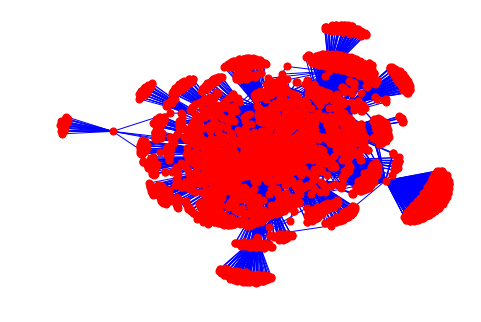

In [2]:
# Display the network
G=nx.read_gexf('C:\\Users\\dell\\Desktop\\MailGraph.gexf')
nx.draw(G,pos=nx.spring_layout(G),node_size=50,edge_color='b')
plt.show()

## 3. Analyzing your Network
### Calculate network metrics

In [46]:
## Macro-level analysis
print(nx.is_connected(G))

# Density 
density = nx.density(G)
print("Network density:", density)

True
Network density: 0.0017222585567909308


In [47]:
#Assortativity : measures the similarity of connections in the graph with respect to the node degree.
r=nx.degree_assortativity_coefficient(G)
print("%3.1f"%r)

-0.5


In [48]:
# Clustring coefficient 
nx.clustering(G)

{'adam.bayer': 0,
 'andrea.ring': 0.08374384236453201,
 'alejandra.chavez': 0.26666666666666666,
 'amanda.rybarski': 0.07692307692307693,
 'announcements.enron': 0.04915514592933948,
 'bob.shults': 0.09941520467836257,
 'christina.sanchez': 0,
 'dana.jones': 0,
 'david.oxley': 0.07586206896551724,
 'edward.brady': 0.1,
 'frank.vickers': 0.15555555555555556,
 'h..cook': 0,
 'infrastructure.ubsw': 0.07509881422924901,
 'james.hungerford': 0.3333333333333333,
 'julie.clyatt': 0.08333333333333333,
 'kimberly.bates': 0.14285714285714285,
 'kulvinder.fowler': 0.1111111111111111,
 'liz.taylor': 0.07792207792207792,
 'melissa.videtto': 0.21818181818181817,
 'michele.winckowski': 0,
 'neil.davies': 0.09057971014492754,
 'no.address': 0.05322947095098994,
 'resources.human': 0.05405405405405406,
 'scott.goodell': 0.6666666666666666,
 'scott.neal': 0.04835698282300224,
 'stephanie.miller': 0.3333333333333333,
 'stephanie.sever': 0.0761904761904762,
 'suzanne.calcagno': 0.38095238095238093,
 'vict

In [49]:
# Diameter
#if not connected, finding the largest component and calculating diameter on that component alone. 
print(nx.is_connected(G))
# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G)
largest_component = max(components, key=len)
# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

True
Network diameter of largest component: 5


In [50]:
# clustering coefficient
#Triadic closure supposes that if two people know the same person, they are likely to know each other
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.019101936900958467


In [57]:
## Micro-level analysis

#create a dictionary of degrees
from operator import itemgetter
degree_dict = dict(G.degree(G.nodes()))
print(degree_dict)
#sort the dictionary of degrees
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print(sorted_degree)
#print the top 20 nodes
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

{'adam.bayer': 2, 'andrea.ring': 29, 'alejandra.chavez': 10, 'amanda.rybarski': 13, 'announcements.enron': 63, 'bob.shults': 19, 'christina.sanchez': 1, 'dana.jones': 1, 'david.oxley': 30, 'edward.brady': 5, 'frank.vickers': 10, 'h..cook': 3, 'infrastructure.ubsw': 23, 'james.hungerford': 7, 'julie.clyatt': 24, 'kimberly.bates': 15, 'kulvinder.fowler': 10, 'liz.taylor': 22, 'melissa.videtto': 11, 'michele.winckowski': 1, 'neil.davies': 24, 'no.address': 79, 'resources.human': 37, 'scott.goodell': 4, 'scott.neal': 104, 'stephanie.miller': 6, 'stephanie.sever': 21, 'suzanne.calcagno': 7, 'victor.lamadrid': 9, '40ect': 2, 'andrew.lewis': 41, '40enron': 42, 'adrianne.engler': 12, 'airam.arteaga': 5, 'alex.villarreal': 6, 'bart.burk': 2, 'cheryl.johnson': 9, 'd..hogan': 10, 'danielle.marcinkowski': 5, 'david.forster': 25, 'denver.plachy': 3, 'di.mu': 1, 'enron.chairman': 5, 'enron.expertfinder': 6, 'georgeanne.hodges': 15, 'huy.dinh': 2, 'iris.mack': 15, 'jin.guo': 1, 'k..allen': 5, 'kirk.m

In [55]:
#Eigenvector centrality cares if you are a hub, but it also cares how many hubs you are connected to. 
eigenvector_dict = nx.eigenvector_centrality(G)
pprint(eigenvector_dict)

{'2.ews': 0.0037602589701925533,
 '40ect': 0.0046949821896925805,
 '40ees': 0.0021090842790367987,
 '40enron': 0.1251763277257142,
 'a..allen': 0.0022862356081075103,
 'a..aune': 0.0011075133494264004,
 'a..bibi': 0.011643858409243112,
 'a..bowen': 0.0015490237304019608,
 'a..casas': 0.003951058362137417,
 'a..davis': 0.008300722692296616,
 'a..garcia': 0.008297873323351204,
 'a..gomez': 0.002726036817723818,
 'a..hope': 0.0025016787802791185,
 'a..howard': 0.0038162416093736025,
 'a..hudler': 0.010279050258408508,
 'a..hughes': 0.00851677527816802,
 'a..knudsen': 0.0025016787802791185,
 'a..lee': 0.0003659819148389361,
 'a..lindholm': 0.007113606741111981,
 'a..martin': 0.008005172564940983,
 'a..price': 0.006432596134001544,
 'a..roberts': 0.018989027247573988,
 'a..robison': 0.012868455736061848,
 'a..rodriguez': 0.0037602589701925533,
 'a..schroeder': 0.005799043912017497,
 'a..shankman': 0.026984783579765838,
 'a..walker': 0.005962769023976705,
 'a.taylor': 0.0037602589701925533,


 'c..willard': 0.0027177313661505237,
 'c..williams': 0.026093173414837176,
 'calger': 0.002867060607986459,
 'calyx.corolla': 0.0031539227126834383,
 'camille.gerard': 0.0015885602692020321,
 'cara.semperger': 0.0022862356081075103,
 'carl.carter': 0.003189891710319683,
 'carl.tricoli': 0.002573763797896424,
 "carla.o'neil": 0.000791465093881972,
 'carlee.gawiuk': 0.000791465093881972,
 'carlos.sole': 0.014015976825542249,
 'carlos.vicens': 0.005799043912017497,
 'carmella.jones': 0.0046201847808973176,
 'carmen.chavira': 0.0020213705649218833,
 'carol.carter': 0.0030321239008058313,
 'carol.coale': 0.0031539227126834383,
 'carol.howes': 0.0013145628290944838,
 'carol.lapsley': 0.002573763797896424,
 'carol.north': 0.005962769023976705,
 'carol.st.': 0.03319458037200226,
 'carole.frank': 0.01275965922797603,
 'caroline.abramo': 0.014539373636518266,
 'caroline.barnes': 0.0013145628290944838,
 'carolyn.george': 0.013771167382973043,
 'carolyn.graham': 0.019108385705256345,
 'carrie.lar

 'jennifer.fraser': 0.006904481139146363,
 'jennifer.mcclain': 0.0030321239008058313,
 'jennifer.mcquade': 0.013646558191506212,
 'jennifer.medcalf': 0.006432596134001544,
 'jennifer.mendez': 0.005252074276400219,
 'jennifer.newbrough': 0.004822519291336244,
 'jennifer.oliver': 0.0037602589701925533,
 'jennifer.reimer': 0.006432596134001544,
 'jennifer.richard': 0.005799043912017497,
 'jennifer.rosado': 0.0026687567586137343,
 'jennifer.song': 0.002659424838513238,
 'jennifer.thome': 0.0021090842790367987,
 'jennifer.velasco': 0.008291791613754405,
 'jennifer.walker': 0.0025016787802791185,
 'jenny.helton': 0.17286397997790906,
 'jenny.latham': 0.002573763797896424,
 'jenny.rub': 0.008934274914280662,
 'jeremy.blachman': 0.0021090842790367987,
 'jeremy.merritt': 0.006432596134001544,
 'jeremy.thirsk': 0.0011012617614463592,
 'jeremy.wong': 0.0052331886364096625,
 'jernigan': 0.0031539227126834383,
 'jerry.britain': 0.0011075133494264004,
 'jerry.peters': 0.0013145628290944838,
 'jess.h

 'nora.dobin': 0.023366114872978627,
 'norm.spalding': 0.005799043912017497,
 'norman.lee': 0.0052331886364096625,
 'notification.isc': 0.050399660396546635,
 'notifications.isc': 0.01862822101951688,
 "o'neal.winfree": 0.005262761915535573,
 'oberg': 0.0031539227126834383,
 'octavio.carranza': 0.0021090842790367987,
 'officeofthechairman2': 0.0617189179844413,
 'olalekan.oladeji': 0.005799043912017497,
 'olga.herrera': 0.0003659819148389361,
 'olivier.herbelot': 0.005962769023976705,
 'olson': 0.0031539227126834383,
 'ora.cross': 0.0025562109311255605,
 'orlando.gonzalez': 0.00484973709103369,
 'oscar.cedeno': 0.0017532231659898164,
 'oscar.dalton': 0.00442403324615079,
 'otis.aust': 0.0031539227126834383,
 'outlook-migration-team': 0.002812361445585276,
 'outlook.team': 0.025372771418299193,
 'p..dupre': 0.008458468750530737,
 "p..o'neil": 0.006432596134001544,
 'p..south': 0.001954265415820007,
 'pablo.torres': 0.005053494465727715,
 'paige.cox': 0.0036750255593427836,
 'palmer': 0.

In [59]:
#Betweenness centrality looks at all the shortest paths that pass through a particular node
betweenness_dict = nx.betweenness_centrality(G) 
print(betweenness_dict)
#Sort Betweenness centrality
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

{'adam.bayer': 4.6266012704420694e-07, 'andrea.ring': 0.003295166363144869, 'alejandra.chavez': 0.0002460745682028448, 'amanda.rybarski': 0.0002419033057732572, 'announcements.enron': 0.0731742983449279, 'bob.shults': 0.0013260693423665473, 'christina.sanchez': 0.0, 'dana.jones': 0.0, 'david.oxley': 0.009041480891334745, 'edward.brady': 2.4218283250866722e-05, 'frank.vickers': 0.0006185275748845689, 'h..cook': 5.720216890155504e-05, 'infrastructure.ubsw': 0.0019627823602997372, 'james.hungerford': 4.188880410074748e-05, 'julie.clyatt': 0.0037076785508265795, 'kimberly.bates': 0.0008265671067836297, 'kulvinder.fowler': 0.00015916645931605681, 'liz.taylor': 0.004055081400702491, 'melissa.videtto': 0.00034696398744020457, 'michele.winckowski': 0.0, 'neil.davies': 0.003039165632892864, 'no.address': 0.1291895042206206, 'resources.human': 0.01864940372350025, 'scott.goodell': 9.707901925458061e-06, 'scott.neal': 0.022540417568967595, 'stephanie.miller': 0.00032910301455880915, 'stephanie.se

In [60]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]
#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: sherri.reinartz | Betweenness Centrality: 0.15975688326653045 | Degree: 281
Name: rosalee.fleming | Betweenness Centrality: 0.1550920331218245 | Degree: 304
Name: no.address | Betweenness Centrality: 0.1291895042206206 | Degree: 79
Name: sally.beck | Betweenness Centrality: 0.10074839481245033 | Degree: 228
Name: rick.buy | Betweenness Centrality: 0.07725843839060766 | Degree: 218
Name: gerald.nemec | Betweenness Centrality: 0.07661340499244368 | Degree: 204
Name: announcements.enron | Betweenness Centrality: 0.0731742983449279 | Degree: 63
Name: vince.kaminski | Betweenness Centrality: 0.06999058225717317 | Degree: 132
Name: kaye.ellis | Betweenness Centrality: 0.06566506147467412 | Degree: 194
Name: rod.hayslett | Betweenness Centrality: 0.05332096197298508 | Degree: 109
Name: paul.y'barbo | Betweenness Centrality: 0.05276954358388109 | Degree: 109
Name: 40enron | Betweenness Centrality: 0.05053980925345601 | Degree: 42
Name: jeff.dasovich | Betweenness Centrality: 0.0460224715

In [61]:
#clustering : measures the density of links in node i’s immediate neighborhood 
clustering=nx.clustering(G)
print(clustering)

{'adam.bayer': 0, 'andrea.ring': 0.08374384236453201, 'alejandra.chavez': 0.26666666666666666, 'amanda.rybarski': 0.07692307692307693, 'announcements.enron': 0.04915514592933948, 'bob.shults': 0.09941520467836257, 'christina.sanchez': 0, 'dana.jones': 0, 'david.oxley': 0.07586206896551724, 'edward.brady': 0.1, 'frank.vickers': 0.15555555555555556, 'h..cook': 0, 'infrastructure.ubsw': 0.07509881422924901, 'james.hungerford': 0.3333333333333333, 'julie.clyatt': 0.08333333333333333, 'kimberly.bates': 0.14285714285714285, 'kulvinder.fowler': 0.1111111111111111, 'liz.taylor': 0.07792207792207792, 'melissa.videtto': 0.21818181818181817, 'michele.winckowski': 0, 'neil.davies': 0.09057971014492754, 'no.address': 0.05322947095098994, 'resources.human': 0.05405405405405406, 'scott.goodell': 0.6666666666666666, 'scott.neal': 0.04835698282300224, 'stephanie.miller': 0.3333333333333333, 'stephanie.sever': 0.0761904761904762, 'suzanne.calcagno': 0.38095238095238093, 'victor.lamadrid': 0.333333333333

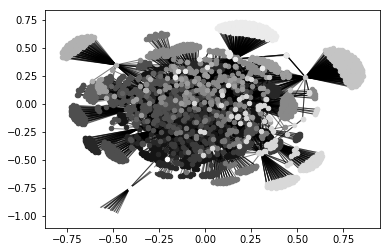

In [63]:
## Meso-level analysis

#first compute the best partition
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

In [67]:
#List of nodes in periphery
p=nx.periphery(G)
pprint(p)

['brian.wood',
 'carol.carter',
 'chris.foster',
 'christopher.czuppon',
 'darren.cross',
 'dean.drozdiak',
 'dolores.muzzy',
 'eric.le',
 'gerry.hrap',
 'howard.sangwine',
 'hr.taylor',
 'jake.thomas',
 'jennifer.mcclain',
 'john.malowney',
 'kevin.heal',
 'kimberly.hardy',
 'morris.clark',
 'nicole.laporte',
 'roy.hartstein',
 'stephane.brodeur',
 'todd.neugebauer',
 'william.bradford',
 "carla.o'neil",
 'carlee.gawiuk',
 'chelsea.bardal',
 'dan.dorland',
 'ian.cooke',
 'john.disturnal',
 'john.zufferli',
 'lisa.mcisaac',
 'mathew.smith',
 'michael.savidant',
 'patricia.henry',
 'alain.diza',
 'angie.zeman',
 'b..fleming',
 'brandon.oliveira',
 'dalton.hogan',
 'gerald.gilbert',
 'h..fletcher',
 'hrgim',
 'jeanne.wukasch',
 'jim.homco',
 'john.hodge',
 'lia.halstead',
 'max.doner',
 'paula.corey',
 'r..barker',
 'r..price',
 'rhonda.smith',
 'robert.ramirez',
 'stephanie.erwin',
 'sylvia.campos',
 'tamara.carter',
 'annette.willis',
 'anwar.melethil',
 'elizabeth.webb',
 'kathryn.bus